In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from statannotations.Annotator import Annotator

fontsize = 13

plt.rcParams.update(
    {
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial"],
        "axes.labelsize": fontsize,
        "legend.fontsize": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "axes.titlesize": fontsize,
        "legend.handlelength": 2,
    }
)

pd.set_option("display.max_rows", None, "display.max_columns", None)

### Reading HeLa data 

In [12]:
# Reading df for all HeLa data including nuclei and condensates

df_HeLa = pd.read_csv("../../data/hela_results/Live_data_all_p_r_dist_HeLa.csv")
df_HeLa = df_HeLa.drop("Unnamed: 0", axis=1)
df_HeLa.head()

,Image name,Cell line,Condition,Physical pixel size Z,Physical pixel size Y,Physical pixel size X,Pixel size (um2),Voxel size (um3),Nucleus ID,Number of total HP1a condensates,Number of voxels nucleus,bbox nucleus (um),Major axis nucleus (um),Intermediate axis nucleus (um),Minor axis nucleus (um),Confiner height (um),Number of voxels inner nucleus object,Number of voxels HP1a condensates,Radial distance random point (um),Radial distance HP1a condensate (um),Peripheral distance random point (um),Peripheral distance HP1a condensate (um),Major axis HP1a condensate (um),Intermediate axis HP1a condensate (um),Minor axis HP1a condensate (um),Radial distance HP1a condensate scaled,Minimum peripheral distance HP1a condensate scaled,Radial distance random point scaled,Minimum peripheral distance random point scaled,Volume HP1a condensate (um3),Volume nucleus (um3)
0,2022-06-08_Image1,HeLa,Confined,0.172917,0.048895,0.048895,0.002391,0.000413,24,4,2589444.0,"[-7.574754904739557, 8.056286264207257, -5.814...",15.631041,11.945122,7.232772,$<8.0$ -- $5.0$,2200305,3397.0,5.646013,4.279559,0.097791,1.226335,1.181031,0.985235,2.247916,0.273786,0.101315,0.361205,0.008079,1.404323,1070.478953
1,2022-06-08_Image1,HeLa,Confined,0.172917,0.048895,0.048895,0.002391,0.000413,24,4,2589444.0,"[-7.574754904739557, 8.056286264207257, -5.814...",15.631041,11.945122,7.232772,$<8.0$ -- $5.0$,2200305,2950.0,3.852059,4.274883,1.627581,1.253098,1.235201,0.876376,2.074999,0.273487,0.103526,0.246436,0.134465,1.219533,1070.478953
2,2022-06-08_Image1,HeLa,Confined,0.172917,0.048895,0.048895,0.002391,0.000413,24,4,2589444.0,"[-7.574754904739557, 8.056286264207257, -5.814...",15.631041,11.945122,7.232772,$<8.0$ -- $5.0$,2200305,4253.0,6.118009,4.542946,1.059469,2.043919,1.225255,0.997894,2.593749,0.290636,0.168861,0.391401,0.087529,1.758195,1070.478953
3,2022-06-08_Image1,HeLa,Confined,0.172917,0.048895,0.048895,0.002391,0.000413,24,4,2589444.0,"[-7.574754904739557, 8.056286264207257, -5.814...",15.631041,11.945122,7.232772,$<8.0$ -- $5.0$,2200305,750.0,3.502960,4.958130,1.587271,0.475013,0.634708,0.526994,1.556249,0.317198,0.039244,0.224103,0.131134,0.310051,1070.478953
4,2022-06-08_Image10,HeLa,Confined,0.172917,0.042544,0.042544,0.001810,0.000313,25,7,2495540.0,"[-8.415203499594583, 8.427515211848217, -4.767...",16.842719,9.900898,5.754173,$<8.0$ -- $5.0$,2139620,1117.0,7.439985,3.379519,0.042544,0.604800,0.794789,0.619415,1.037499,0.200652,0.071380,0.441733,0.005021,0.349604,781.066393


In [13]:
# Reading df for HeLa nuclei sum data

df_sum_HeLa = pd.read_csv("../../data/hela_results/df_sum_HeLa_nuclei.csv")
df_sum_HeLa = df_sum_HeLa.drop("Unnamed: 0", axis=1)
df_sum_HeLa.head()

,Image name,Confiner_height,Condition,Number of total HP1a condensates,Volume nucleus (um3),Sphericity,Major axis nucleus (um),Intermediate axis nucleus (um),Minor axis nucleus (um),Flatness nucleus (um),Elongation nucleus (um),Condensate volume fraction
0,2022-05-31_Image1,Non-confined,Non-Confined,7,1261.029737,0.525473,19.610761,12.351298,10.293045,0.275523,0.206386,0.002984
1,2022-05-31_Image2,Non-confined,Non-Confined,12,1024.457226,0.432716,15.949645,13.686161,10.447267,0.190670,0.073671,0.008236
2,2022-05-31_Image3,Non-confined,Non-Confined,13,1082.543536,0.415882,17.110248,14.684431,11.266352,0.188547,0.073596,0.006359
3,2022-05-31_Image4,Non-confined,Non-Confined,12,1118.181869,0.419505,16.591365,15.676924,8.309097,0.292322,0.027948,0.009526
4,2022-05-31_Image5,Non-confined,Non-Confined,10,686.752768,0.461579,13.994444,11.547059,9.226319,0.188037,0.091640,0.010233


### Reading IMR90 data 

In [14]:
# Reading df for all IMR90 data including nuclei and condensates

df_IMR90 = pd.read_csv("../../data/imr90_results/Live_data_all_p_r_dist_IMR90.csv")
df_IMR90 = df_IMR90.drop("Unnamed: 0", axis=1)
df_IMR90.head()

,Image name,Cell line,Condition,Physical pixel size Z,Physical pixel size Y,Physical pixel size X,Pixel size (um2),Voxel size (um3),Nucleus ID,Number of total HP1a condensates,Number of voxels nucleus,bbox nucleus (um),Major axis nucleus (um),Intermediate axis nucleus (um),Minor axis nucleus (um),Confiner height (um),Number of voxels inner nucleus object,Number of voxels HP1a condensates,Radial distance random point (um),Radial distance HP1a condensate (um),Peripheral distance random point (um),Peripheral distance HP1a condensate (um),Major axis HP1a condensate (um),Intermediate axis HP1a condensate (um),Minor axis HP1a condensate (um),Radial distance HP1a condensate scaled,Minimum peripheral distance HP1a condensate scaled,Radial distance random point scaled,Minimum peripheral distance random point scaled,Volume HP1a condensate (um3),Volume nucleus (um3)
0,2021-12-22_Image1,IMR90,Confined,0.172917,0.048917,0.048917,0.002393,0.000414,10,7,1504896.0,"[-12.1634745038257, 12.48061380290174, -5.3169...",24.644088,11.861067,3.81,$<5.0$ -- $3.0$,1251336,4905.0,9.254971,9.432011,0.690024,0.861508,1.668253,1.218538,1.556249,0.382729,0.226118,0.375545,0.181109,2.029497,622.666968
1,2021-12-22_Image1,IMR90,Confined,0.172917,0.048917,0.048917,0.002393,0.000414,10,7,1504896.0,"[-12.1634745038257, 12.48061380290174, -5.3169...",24.644088,11.861067,3.81,$<5.0$ -- $3.0$,1251336,166.0,11.706848,9.052509,0.000000,1.318414,0.411699,0.327380,0.691666,0.367330,0.346041,0.475037,0.000000,0.068684,622.666968
2,2021-12-22_Image1,IMR90,Confined,0.172917,0.048917,0.048917,0.002393,0.000414,10,7,1504896.0,"[-12.1634745038257, 12.48061380290174, -5.3169...",24.644088,11.861067,3.81,$<5.0$ -- $3.0$,1251336,856.0,4.495939,8.960055,1.244104,1.342271,1.073534,0.655913,0.864583,0.363578,0.352302,0.182435,0.326536,0.354179,622.666968
3,2021-12-22_Image1,IMR90,Confined,0.172917,0.048917,0.048917,0.002393,0.000414,10,7,1504896.0,"[-12.1634745038257, 12.48061380290174, -5.3169...",24.644088,11.861067,3.81,$<5.0$ -- $3.0$,1251336,16977.0,1.990460,6.083437,1.018983,2.334426,3.569297,2.110456,1.556249,0.246852,0.500000,0.080768,0.267450,7.024417,622.666968
4,2021-12-22_Image1,IMR90,Confined,0.172917,0.048917,0.048917,0.002393,0.000414,10,7,1504896.0,"[-12.1634745038257, 12.48061380290174, -5.3169...",24.644088,11.861067,3.81,$<5.0$ -- $3.0$,1251336,3088.0,4.395121,3.931844,0.426397,1.327829,1.420332,1.112015,1.037499,0.159545,0.348512,0.178344,0.111915,1.277693,622.666968


In [15]:
# Reading df for IMR90 nuclei sum data

df_sum_IMR90 = pd.read_csv("../../data/imr90_results/df_sum_IMR90_nuclei.csv")
df_sum_IMR90 = df_sum_IMR90.drop("Unnamed: 0", axis=1)
df_sum_IMR90.head()

,Image name,Confiner_height,Condition,Number of total HP1a condensates,Volume nucleus (um3),Sphericity,Major axis nucleus (um),Intermediate axis nucleus (um),Minor axis nucleus (um),Flatness nucleus (um),Elongation nucleus (um),Condensate volume fraction
0,2021-11-25_Image1,Non-confined,Non-Confined,33,521.441266,0.348753,25.590865,10.187641,4.166849,0.596483,0.369051,0.029218
1,2021-11-30_Image1,Non-confined,Non-Confined,18,534.863666,0.367236,18.399639,10.131669,6.191242,0.419925,0.257945,0.051704
2,2021-11-30_Image2,Non-confined,Non-Confined,24,364.310495,0.308742,13.884621,10.602361,6.743281,0.303103,0.126155,0.038492
3,2021-11-30_Image4,Non-confined,Non-Confined,21,864.429193,0.303597,19.177440,14.212351,6.967060,0.397261,0.139130,0.016504
4,2021-12-16_Image2,Non-confined,Non-Confined,7,1029.594737,0.291310,24.822951,15.448067,6.663535,0.481886,0.211121,0.019204


### Figure 1 plots 

#### Minor axis nucleus

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/4227916285.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 3-5: Mann-Whitney-Wilcoxon test two-sided, P_val:4.844e-06 U_stat=2.590e+02
3-5 vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.125e-05 U_stat=1.820e+02
Non-confined vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:2.365e-06 U_stat=2.470e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/4227916285.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 5-8: Mann-Whitney-Wilcoxon test two-sided, P_val:4.545e-09 U_stat=5.520e+02
5-8 vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:2.973e-06 U_stat=2.640e+02
Non-confined vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:3.511e-06 U_stat=2.530e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/4227916285.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/4227916285.py:147: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_HeLa)


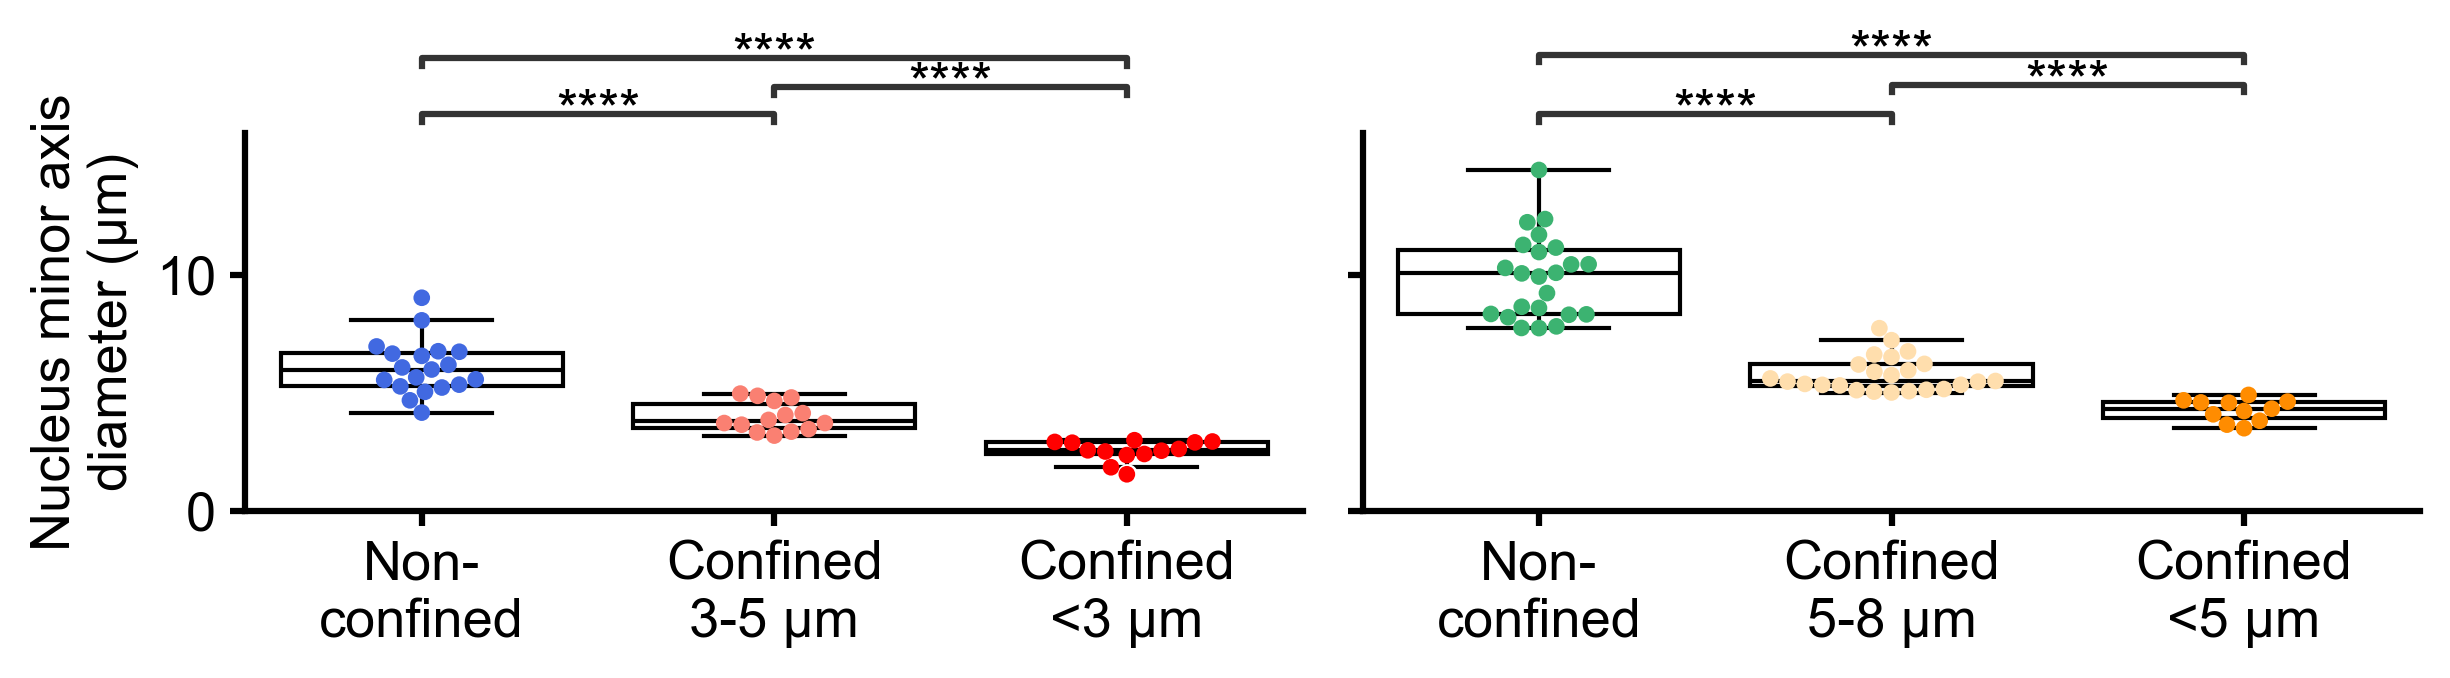

In [16]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 60

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "3-5", "<3"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "5-8", "<5"]

my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}

# A) Minor axis Z IMR90
feature = "Minor axis nucleus (um)"
sns.boxplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)


sns.swarmplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)

axes[0].set(ylabel=r"Minor axis ($\mu$m)")
# axes[0][0].set_ylim(0, 12)
axes[0].set(xlabel=None)
axes[0].set_ylim(0, 16)


# IMR90 statistics
pairs = [
    (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    (confiner_labels_IMR90[1], confiner_labels_IMR90[2]),
]

annotator = Annotator(
    ax=axes[0], pairs=pairs, data=df_sum_IMR90, x="Confiner_height", y=feature, order=confiner_labels_IMR90
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-6)
annotator.apply_and_annotate()

# Minor axis HeLa
feature = "Minor axis nucleus (um)"
sns.boxplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


sns.swarmplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set_ylim(0, 16)

# HeLa statistics
# FIGURE [0][1] B)
pairs = [
    (confiner_labels_HeLa[0], confiner_labels_HeLa[1]),
    (confiner_labels_HeLa[0], confiner_labels_HeLa[2]),
    (confiner_labels_HeLa[1], confiner_labels_HeLa[2]),
]

annotator = Annotator(
    ax=axes[1], pairs=pairs, data=df_sum_HeLa, x="Confiner_height", y=feature, order=confiner_labels_HeLa
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-6)
annotator.apply_and_annotate()

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)
axes[0].spines["bottom"].set_linewidth(lw)
axes[0].tick_params(axis="both", which="major", width=lw)

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)
axes[1].spines["bottom"].set_linewidth(lw)
axes[1].tick_params(axis="both", which="major", width=lw)

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)

new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]
new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_HeLa)
axes[0].set_ylabel("Nucleus minor axis\ndiameter (µm)")


plt.savefig("../../Figures/Figure1/Figure1C_F.pdf", bbox_inches="tight", dpi=300)


plt.show()

#### Flatness nucleus

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2319629608.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2319629608.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3-5 vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.481e-03 U_stat=2.500e+01
Non-confined vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:5.095e-03 U_stat=5.000e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 5-8: Mann-Whitney-Wilcoxon test two-sided, P_val:6.763e-06 U_stat=6.400e+01
5-8 vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.106e-02 U_stat=6.000e+01
Non-confined vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.952e-05 U_stat=1.000e+01


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2319629608.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2319629608.py:140: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_HeLa)


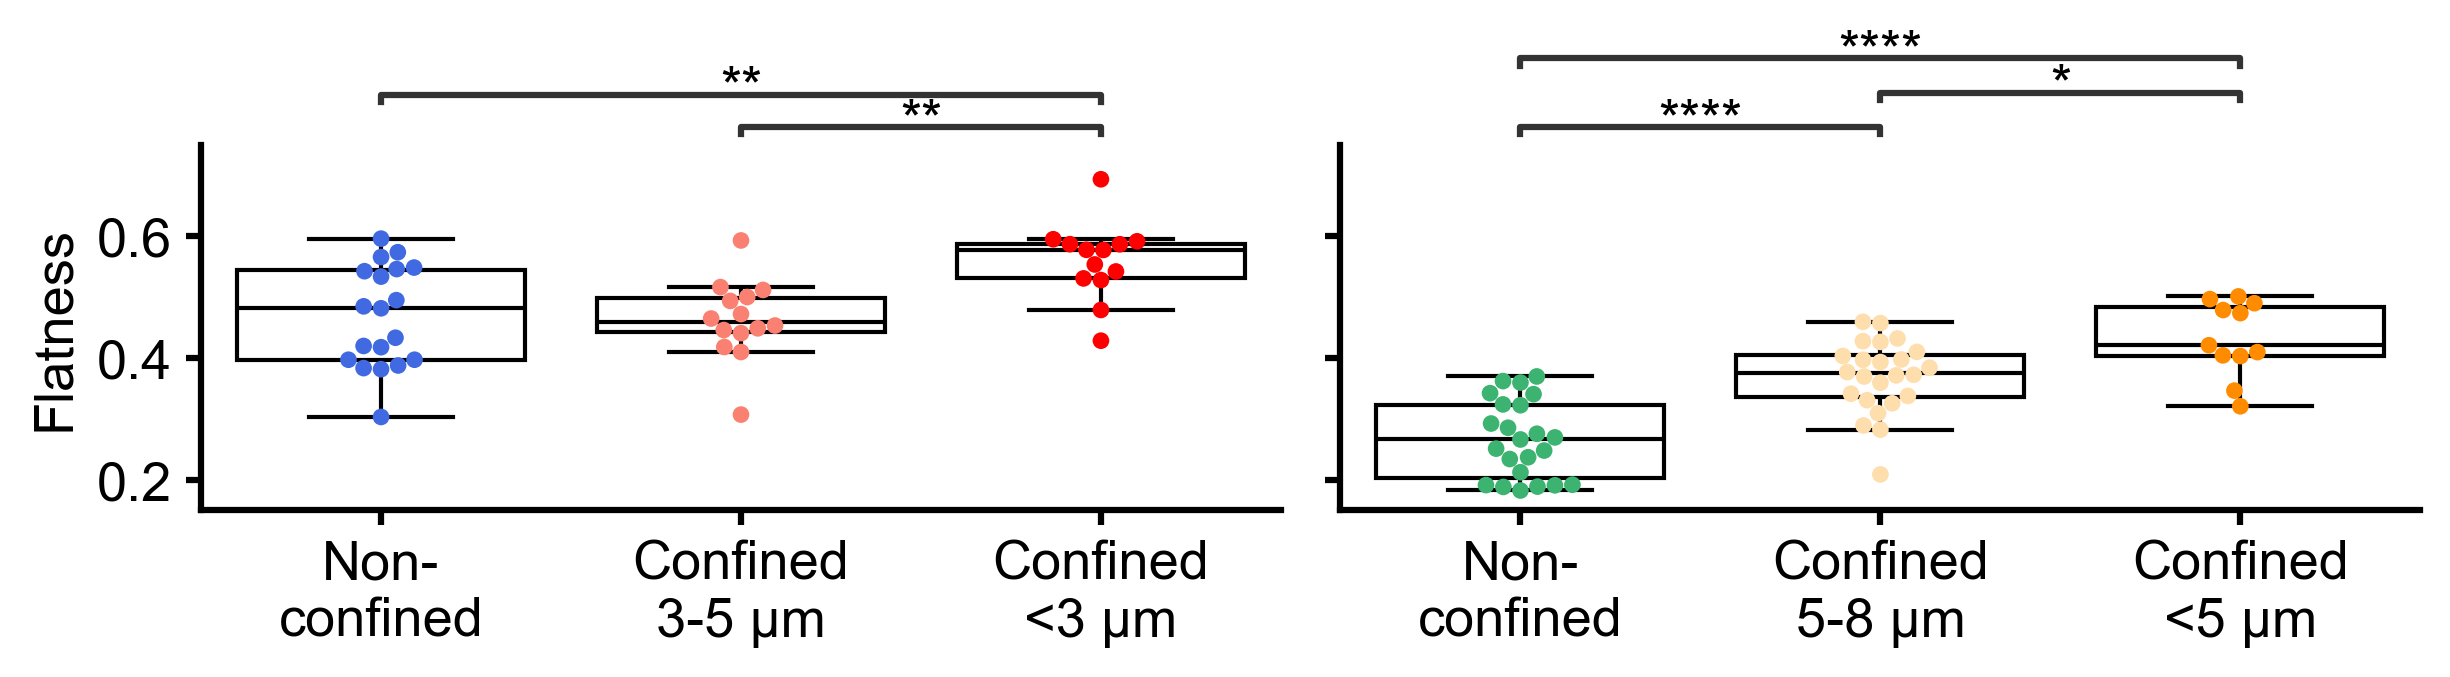

In [17]:
##### Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 60

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "3-5", "<3"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "5-8", "<5"]

my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}

feature = "Flatness nucleus (um)"
sns.boxplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)

axes[0].set(ylabel=r"Minor axis ($\mu$m)")
axes[0].set(xlabel=None)
axes[0].set_ylim(0.15, 0.75)

# IMR90 statistics
pairs = [  # (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    (confiner_labels_IMR90[1], confiner_labels_IMR90[2]),
]

annotator = Annotator(
    ax=axes[0], pairs=pairs, data=df_sum_IMR90, x="Confiner_height", y=feature, order=confiner_labels_IMR90
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-5)
annotator.apply_and_annotate()

feature = "Flatness nucleus (um)"
sns.boxplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


sns.swarmplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set_ylim(0.15, 0.75)

# HeLa statistics
pairs = [
    (confiner_labels_HeLa[0], confiner_labels_HeLa[1]),
    (confiner_labels_HeLa[0], confiner_labels_HeLa[2]),
    (confiner_labels_HeLa[1], confiner_labels_HeLa[2]),
]

annotator = Annotator(
    ax=axes[1], pairs=pairs, data=df_sum_HeLa, x="Confiner_height", y=feature, order=confiner_labels_HeLa
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-5)
annotator.apply_and_annotate()

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)
axes[0].spines["bottom"].set_linewidth(lw)
axes[0].tick_params(axis="both", which="major", width=lw)

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)
axes[1].spines["bottom"].set_linewidth(lw)
axes[1].tick_params(axis="both", which="major", width=lw)

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)

new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]
new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_HeLa)
axes[0].set_ylabel("Flatness")

plt.savefig("../../Figures/Figure1/Figure1D_G.pdf", bbox_inches="tight", dpi=300)


plt.show()

### Figure 3 plots

#### Number of HP1a condensates

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2627872200.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 3-5: Mann-Whitney-Wilcoxon test two-sided, P_val:4.745e-04 U_stat=2.290e+02
3-5 vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:4.064e-02 U_stat=4.850e+01
Non-confined vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:4.094e-02 U_stat=1.770e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2627872200.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2627872200.py:142: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2627872200.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_HeLa)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 5-8: Mann-Whitney-Wilcoxon test two-sided, P_val:5.113e-03 U_stat=4.070e+02
Non-confined vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:7.195e-03 U_stat=1.995e+02


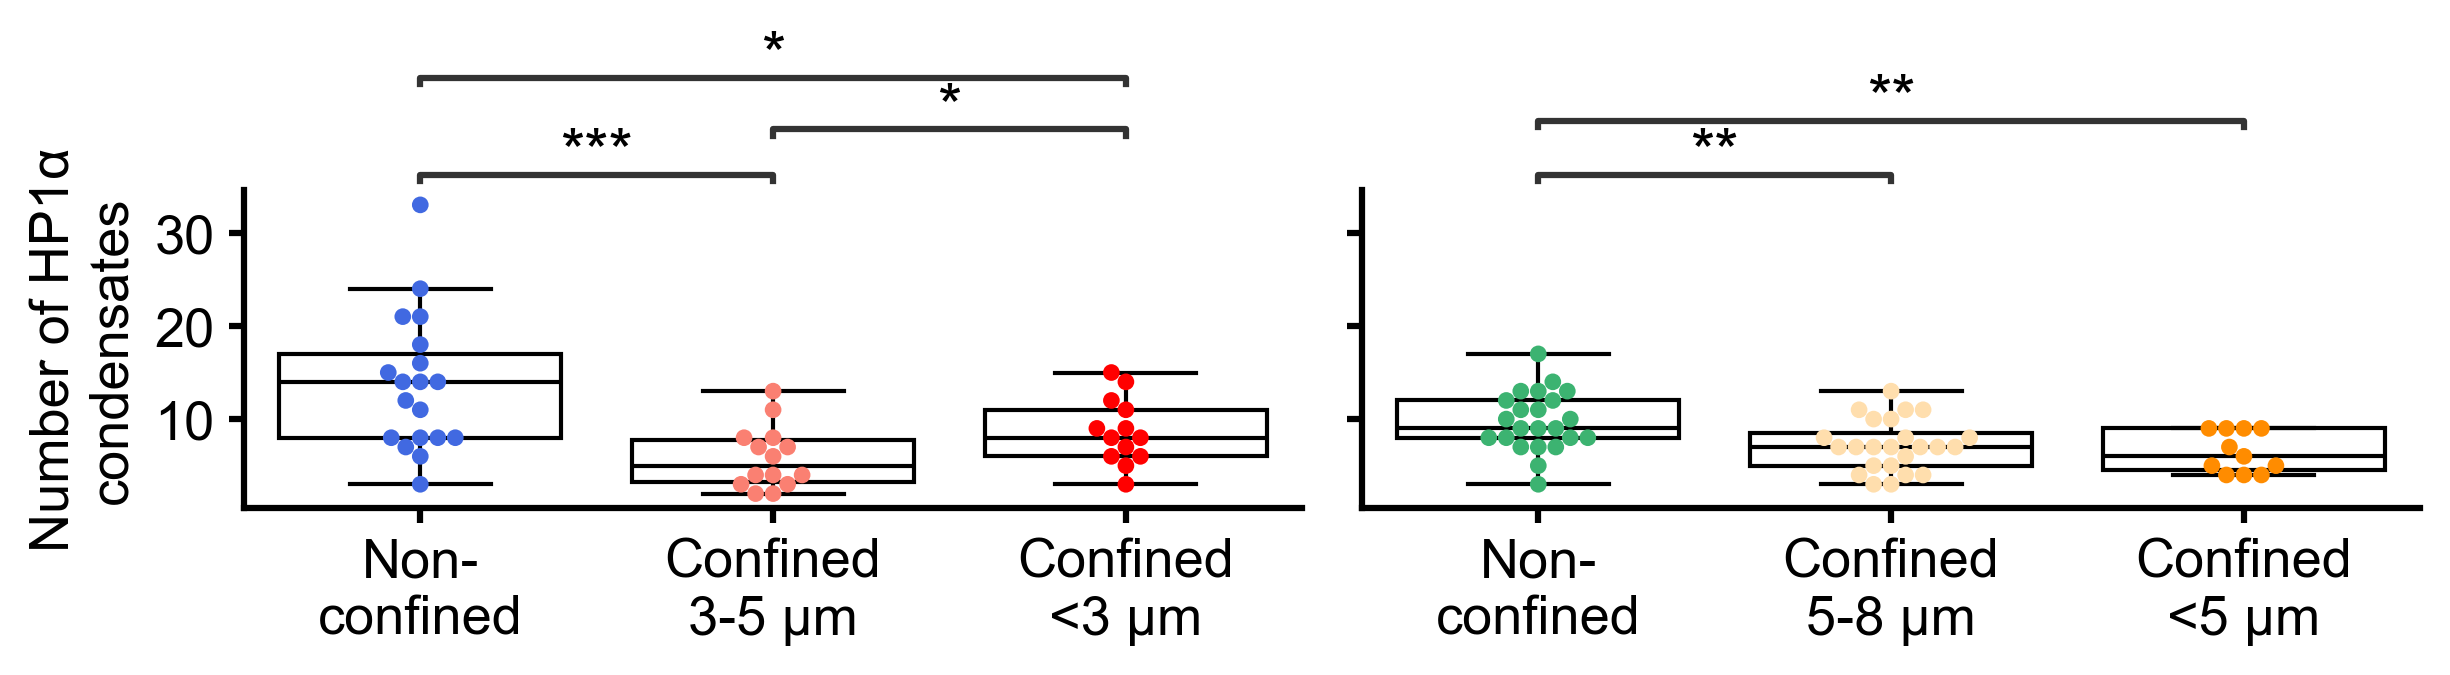

In [18]:
##### Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 60

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "3-5", "<3"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "5-8", "<5"]

my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}

# A) Minor axis Z IMR90
feature = "Number of total HP1a condensates"
sns.boxplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)


axes[0].set(xlabel=None)

# IMR90 statistics
pairs = [
    (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    (confiner_labels_IMR90[1], confiner_labels_IMR90[2]),
]

annotator = Annotator(
    ax=axes[0], pairs=pairs, data=df_sum_IMR90, x="Confiner_height", y=feature, order=confiner_labels_IMR90
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

# HeLa
feature = "Number of total HP1a condensates"
sns.boxplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


sns.swarmplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)

# HeLa statistics
pairs = [
    (confiner_labels_HeLa[0], confiner_labels_HeLa[1]),
    (confiner_labels_HeLa[0], confiner_labels_HeLa[2]),
    # (confiner_labels_HeLa[1], confiner_labels_HeLa[2])
]

annotator = Annotator(
    ax=axes[1], pairs=pairs, data=df_sum_HeLa, x="Confiner_height", y=feature, order=confiner_labels_HeLa
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)
axes[0].spines["bottom"].set_linewidth(lw)
axes[0].tick_params(axis="both", which="major", width=lw)

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)
axes[1].spines["bottom"].set_linewidth(lw)
axes[1].tick_params(axis="both", which="major", width=lw)

fontsize = 15

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)

new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]
new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_HeLa)
axes[0].set_ylabel("Number of HP1α\ncondensates")

plt.savefig("../../Figures/Figure3/Figure3B_F.pdf", bbox_inches="tight", dpi=300)

plt.show()

#### Total HP1a condensate to nuclear fraction

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/1128056752.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/1128056752.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 3-5: Mann-Whitney-Wilcoxon test two-sided, P_val:4.244e-03 U_stat=2.120e+02
Non-confined vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.132e-03 U_stat=2.010e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 5-8: Mann-Whitney-Wilcoxon test two-sided, P_val:1.224e-05 U_stat=4.820e+02
Non-confined vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.754e-03 U_stat=2.120e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/1128056752.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/1128056752.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_HeLa)


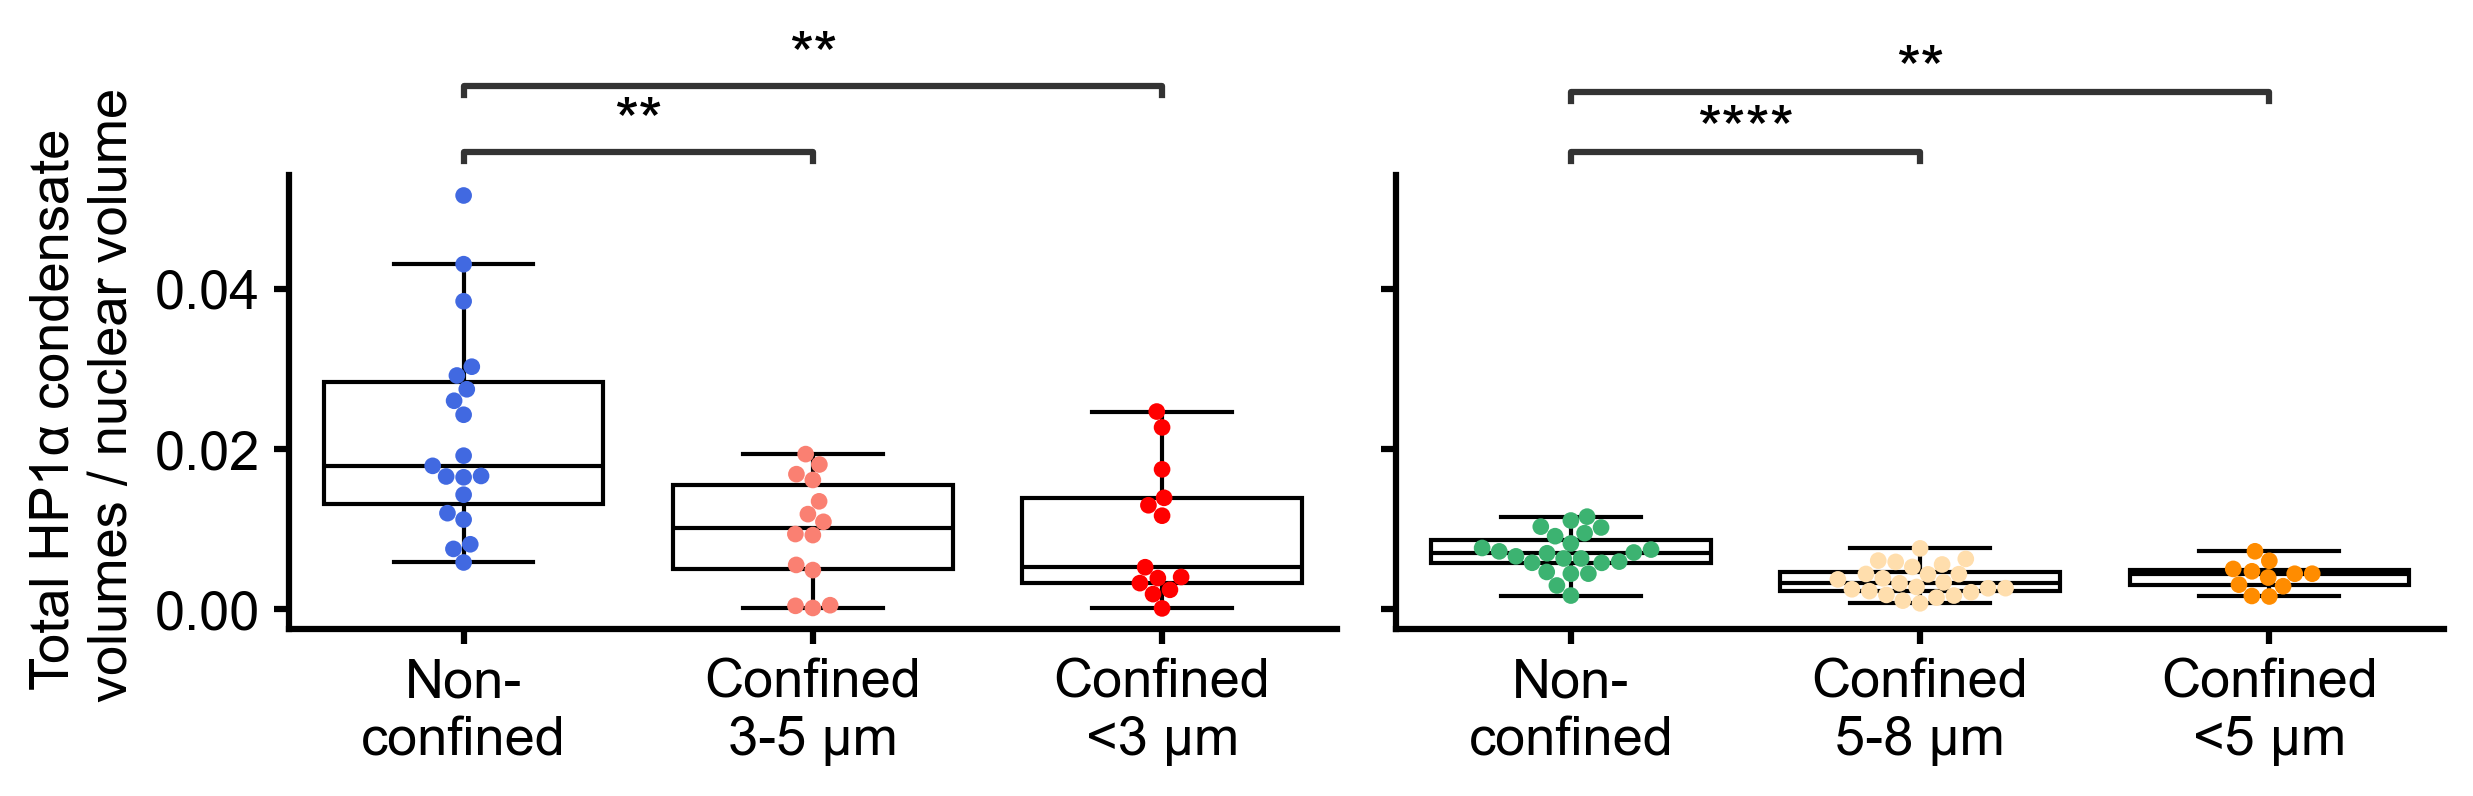

In [19]:
##### Specify width and height in millimeters
fig_width_mm = 212
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "3-5", "<3"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "5-8", "<5"]
my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}


# IMR90
feature = "Condensate volume fraction"
sns.boxplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)


sns.swarmplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)

axes[0].set(xlabel=None)


pairs = [
    (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    # (confiner_labels_IMR90[1], confiner_labels_IMR90[2])
]

annotator = Annotator(
    ax=axes[0], pairs=pairs, data=df_sum_IMR90, x="Confiner_height", y=feature, order=confiner_labels_IMR90
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-0.2)
annotator.apply_and_annotate()

# HeLa
feature = "Condensate volume fraction"
sns.boxplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


axes[1].set(ylabel=None)

sns.swarmplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)


axes[1].set(xlabel=None)


# HeLa statistics
pairs = [
    (confiner_labels_HeLa[0], confiner_labels_HeLa[1]),
    (confiner_labels_HeLa[0], confiner_labels_HeLa[2]),
    # (confiner_labels_HeLa[1], confiner_labels_HeLa[2]),
]

annotator = Annotator(
    ax=axes[1], pairs=pairs, data=df_sum_HeLa, x="Confiner_height", y=feature, order=confiner_labels_HeLa
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)
axes[0].spines["bottom"].set_linewidth(lw)
axes[0].tick_params(axis="both", which="major", width=lw)

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)
axes[1].spines["bottom"].set_linewidth(lw)
axes[1].tick_params(axis="both", which="major", width=lw)

fontsize = 15

for p in axes[0].texts:
    p.set_fontsize(fontsize)

for p in axes[1].texts:
    p.set_fontsize(fontsize)

axes[0].set(xlabel=None)
axes[1].set(xlabel=None)

new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]
new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_HeLa)
axes[0].set_ylabel("Total HP1α condensate \n volumes / nuclear volume")

axes[1].set(ylabel=None)

plt.savefig("../../Figures/Figure3/Figure3D_H.pdf", bbox_inches="tight", dpi=300)

plt.show()

### Figure 6 plots

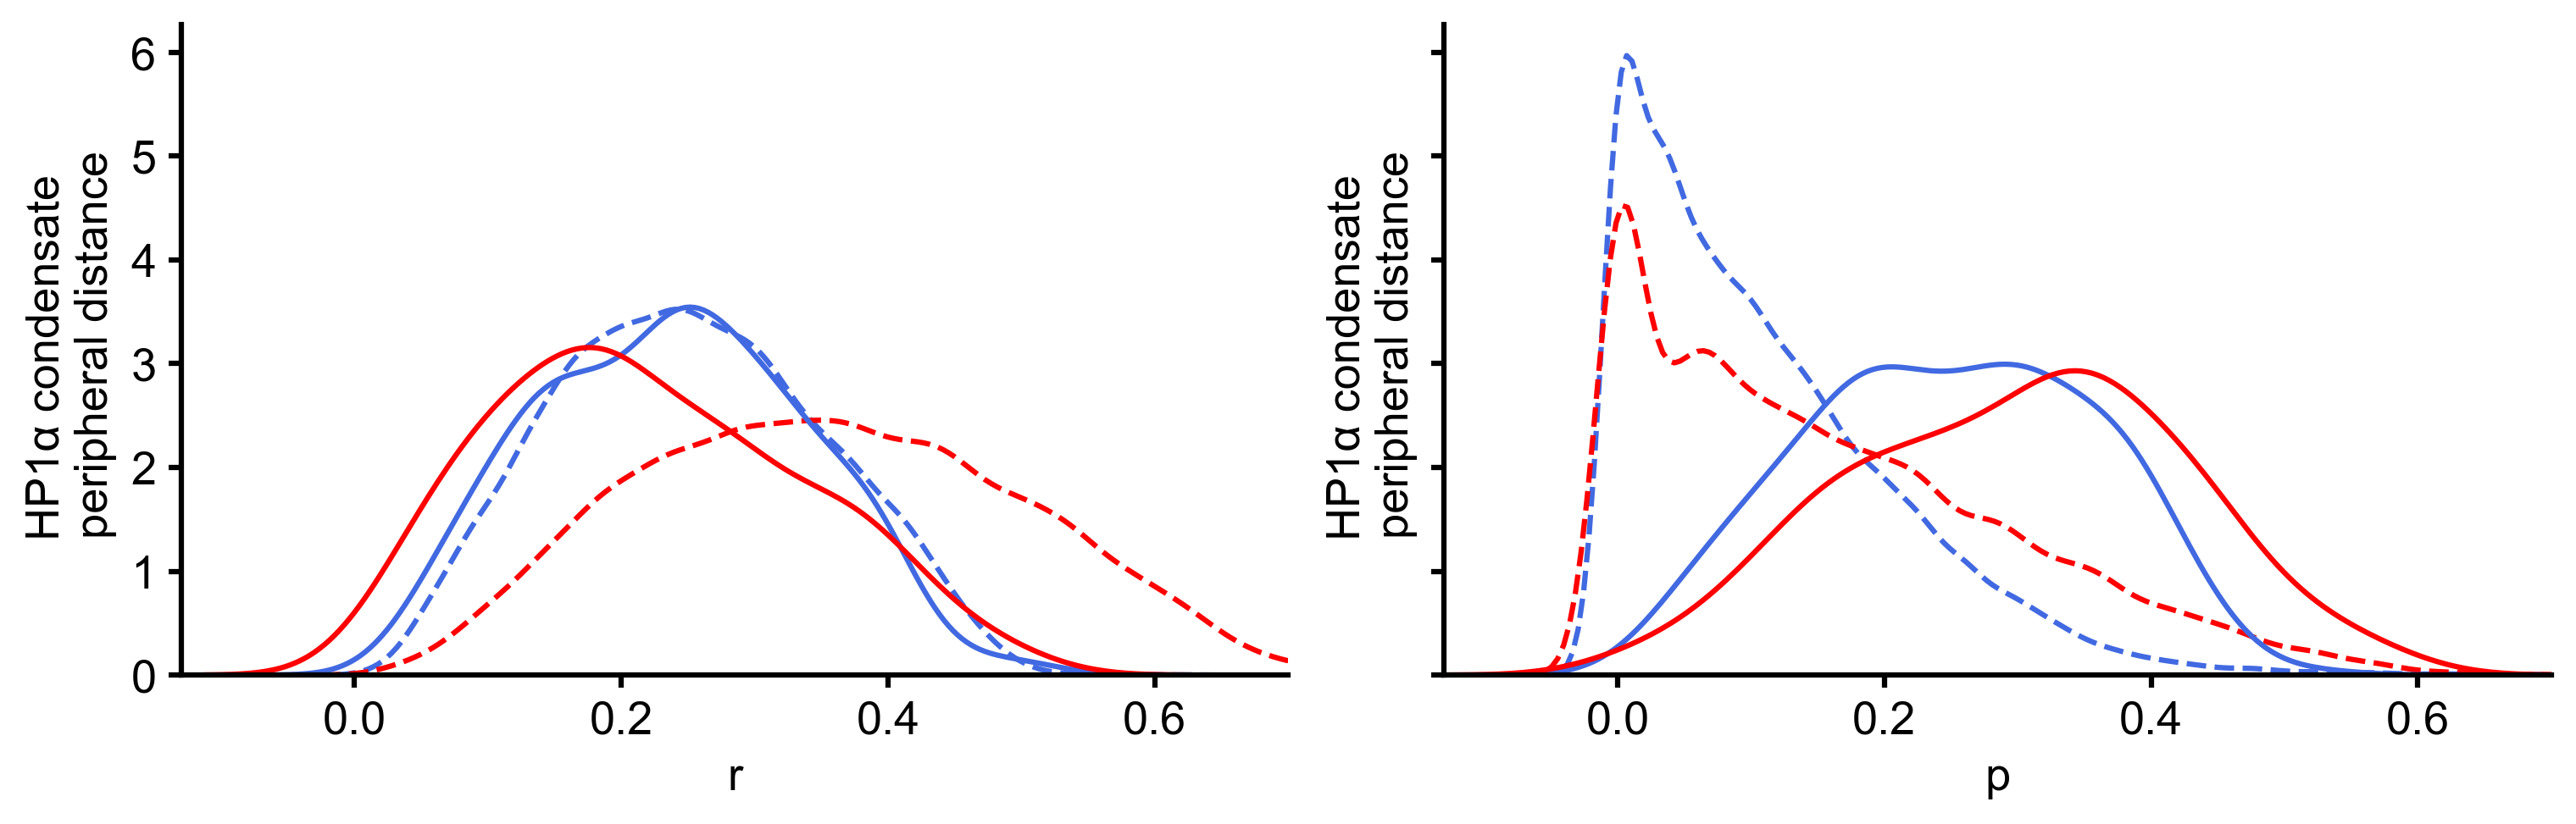

In [21]:
##### Specify width and height in millimeters
fig_width_mm = 260
fig_height_mm = 85

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

# Radial distance IMR90
sns.kdeplot(data=rp_nc_IMR90, ax=axes[0], x="r_major_axis", color="royalblue", linestyle="--", label="NC_ctrl")
sns.kdeplot(data=rp_conf_IMR90, ax=axes[0], x="r_major_axis", color="r", linestyle="--", label="Conf_ctrl")
sns.kdeplot(data=cond_nc_IMR90, ax=axes[0], x="r_major_axis", color="royalblue", label="NC_cond")
sns.kdeplot(data=cond_conf_IMR90, ax=axes[0], x="r_major_axis", color="r", label="Conf_cond")

axes[0].set(xlabel=r"r")
axes[1].set(ylabel="HP1α condensate \n peripheral distance")
axes[0].set(ylabel="HP1α condensate \n peripheral distance")

axes[0].set_xlim(-0.13, 0.7)
axes[0].set_xticks([0, 0.2, 0.4, 0.6])


# Peripheral distance IMR90
sns.kdeplot(data=rp_nc_IMR90, ax=axes[1], x="p_minor_axis", color="royalblue", linestyle="--", label="NC_ctrl")
sns.kdeplot(data=rp_conf_IMR90, ax=axes[1], x="p_minor_axis", color="r", linestyle="--", label="Conf_ctrl")
sns.kdeplot(data=cond_nc_IMR90, ax=axes[1], x="p_agg_min/z_length_x", color="royalblue", label="NC_cond")
sns.kdeplot(data=cond_conf_IMR90, ax=axes[1], x="p_agg_min/z_length_x", color="r", label="Conf_cond")

axes[1].set(xlabel=r"p")
axes[1].set_xlim(-0.13, 0.7)
axes[1].set_xticks([0, 0.2, 0.4, 0.6])


lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

plt.savefig("../../Figures/Figure6/Figure6B_C.pdf", bbox_inches="tight", dpi=300)
plt.show()

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_76551/3267651932.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_76551/3267651932.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_76551/3267651932.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_76551/3267651932.py:130: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. afte

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. $<3.0$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.215e-02 U_stat=1.393e+04
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$<5.0$ -- $3.0$ vs. $<3.0$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.946e-03 U_stat=3.594e+03
Non-confined vs. $<3.0$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.774e-07 U_stat=7.681e+03


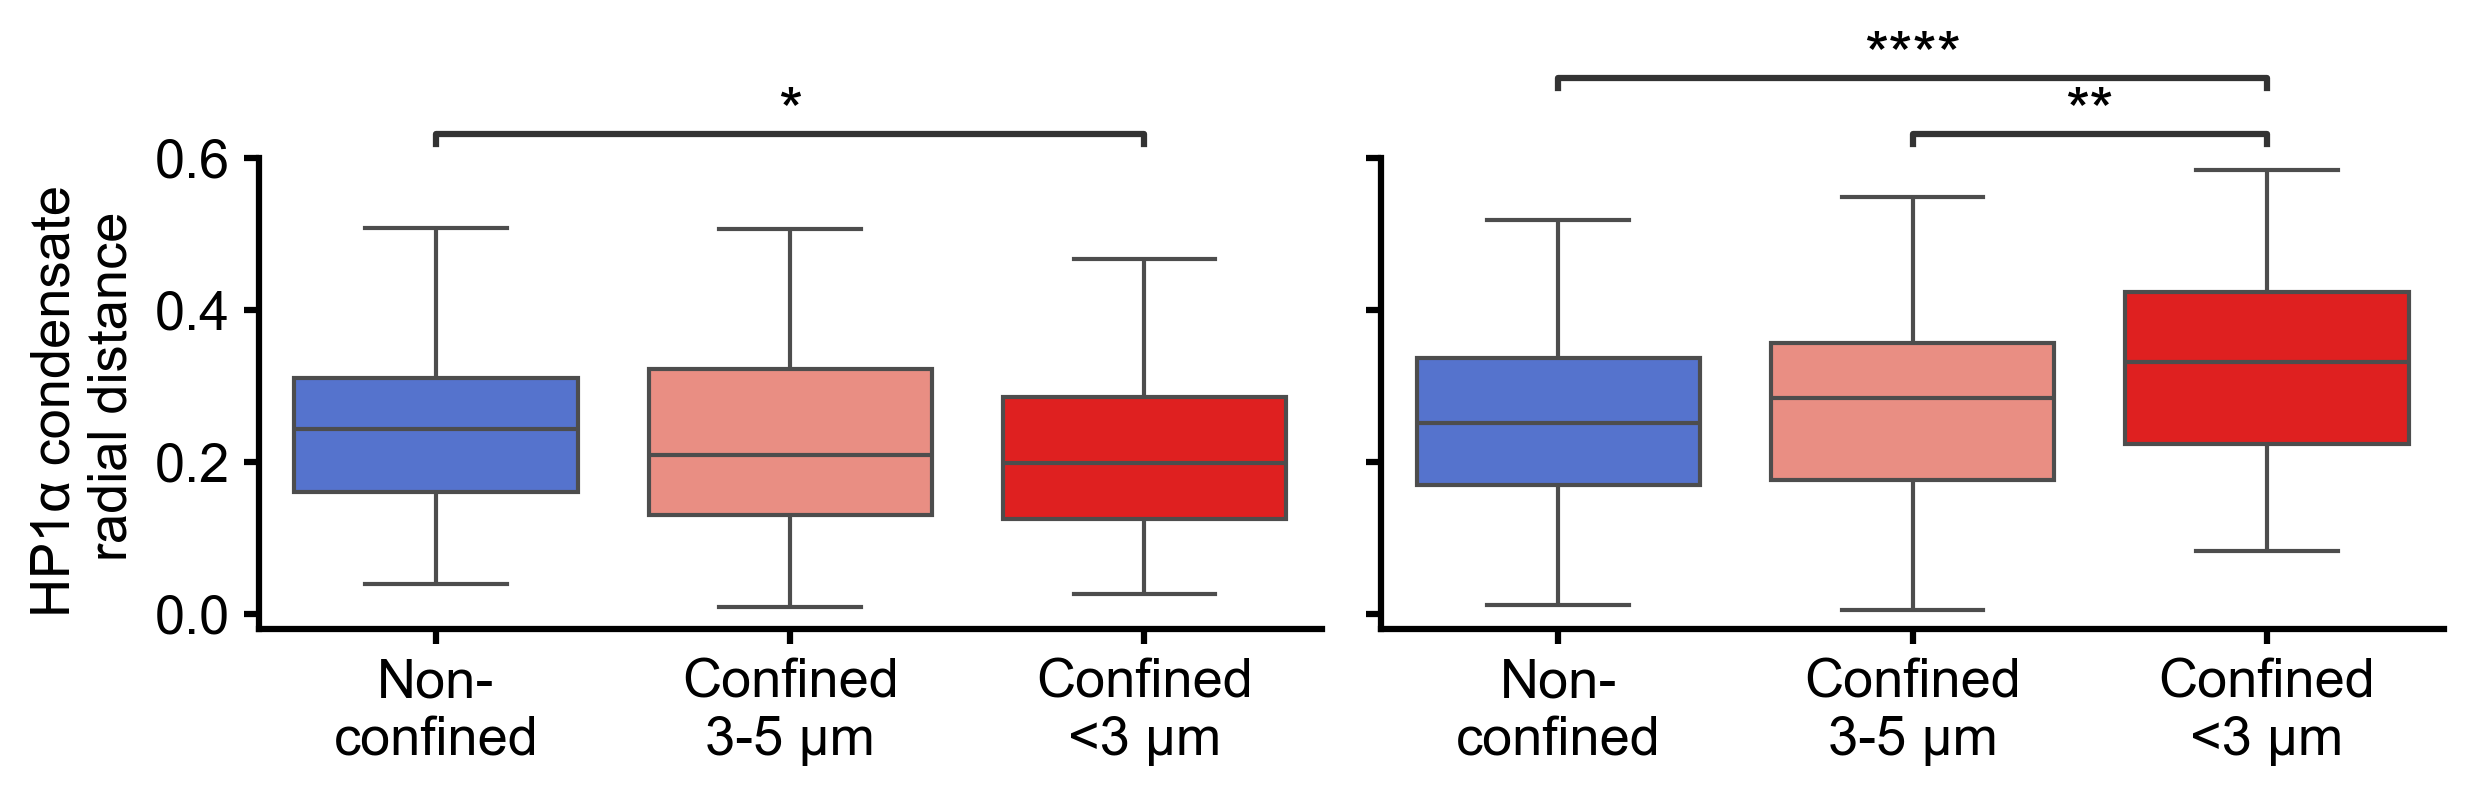

In [23]:
##### Specify width and height in millimeters
fig_width_mm = 212
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "$<5.0$ -- $3.0$", "$<3.0$"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

# A) radial distance unscaled IMR90
feature = "r_major_axis"
sns.boxplot(
    data=df_nuc_cond_IMR90,
    x="Confiner height ($\mu$m)",
    order=confiner_labels_IMR90,
    y=feature,
    palette=my_pal_IMR90,
    # color='white',
    # width=0.5,
    # boxprops=dict(edgecolor='black'),
    # capprops=dict(color='black'),
    # whiskerprops=dict(color='black'),
    # medianprops=dict(color='black'),
    # flierprops=dict(marker='o', markersize=4, markerfacecolor='white', markeredgecolor='white'),
    ax=axes[0],
)


# sns.swarmplot(data=df_nuc_cond_IMR90, x="Confiner height ($\mu$m)", y=feature, order=confiner_labels_IMR90, palette=my_pal_IMR90,
#              ax=axes[0], size=4)

axes[0].set(ylabel="HP1α condensate \n radial distance")
axes[0].set(xlabel=None)

axes[0].set_ylim(-0.02, 0.6)


# IMR90 statistics
# FIGURE [0] C)
pairs = [  # (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    # (confiner_labels_IMR90[1], confiner_labels_IMR90[2])
]

annotator = Annotator(
    ax=axes[0],
    pairs=pairs,
    data=df_nuc_cond_IMR90,
    x="Confiner height ($\mu$m)",
    y=feature,
    order=confiner_labels_IMR90,
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()


# C) peripheral distance unscaled IMR90
feature = "p_agg_min/z_length_x"
sns.boxplot(
    data=df_nuc_cond_IMR90,
    x="Confiner height ($\mu$m)",
    order=confiner_labels_IMR90,
    y=feature,
    palette=my_pal_IMR90,
    ax=axes[1],
)

axes[1].set(ylabel="HP1α condensate \n peripheral distance")
axes[1].set(xlabel=None)
# axes[1].set(ylabel=None)

# axes[1].text(-0.1, 1.1, "C)", transform=axes[1].transAxes, size=20, weight='bold')

# IMR90 statistics
# FIGURE [1] C)
pairs = [  # (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    (confiner_labels_IMR90[1], confiner_labels_IMR90[2]),
]


annotator = Annotator(
    ax=axes[1],
    pairs=pairs,
    data=df_nuc_cond_IMR90,
    x="Confiner height ($\mu$m)",
    y=feature,
    order=confiner_labels_IMR90,
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()


lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)

axes[0].set_ylim(-0.02, 0.6)


new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_IMR90)


plt.savefig("../../Figures/Figure6/Figure6D_E.pdf", bbox_inches="tight", dpi=300)
plt.show()

### Supplementary figures

In [ ]:
# Suppl.
# Sphericity
# Elongation
# Major axis
# Intermediate axis
# Volume
# Peripheral distances for HeLa.

#### Supplementary Figure 1 

In [49]:
df_IMR90_sphericity = pd.read_csv("../../data/imr90_results/df_IMR90_sphericity.csv")
df_IMR90_sphericity = df_IMR90_sphericity.drop("Unnamed: 0", axis=1)

df_HeLa_sphericity = pd.read_csv("../../data/hela_results/df_HeLa_sphericity.csv")
df_HeLa_sphericity = df_HeLa_sphericity.drop("Unnamed: 0", axis=1)

,Sphericity_nucleus,Confiner height ($\mu$m)
0,0.542361,Non-confined
1,0.467040,Non-confined
2,0.442793,Non-confined
3,0.431915,Non-confined
4,0.497356,Non-confined


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/299281831.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/299281831.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. $<5.0$ -- $3.0$: Mann-Whitney-Wilcoxon test two-sided, P_val:3.152e-02 U_stat=2.050e+02
Non-confined vs. $<3.0$: Mann-Whitney-Wilcoxon test two-sided, P_val:4.602e-02 U_stat=1.760e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. $<8.0$ -- $5.0$: Mann-Whitney-Wilcoxon test two-sided, P_val:3.278e-03 U_stat=3.830e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/299281831.py:146: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/299281831.py:147: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_HeLa)


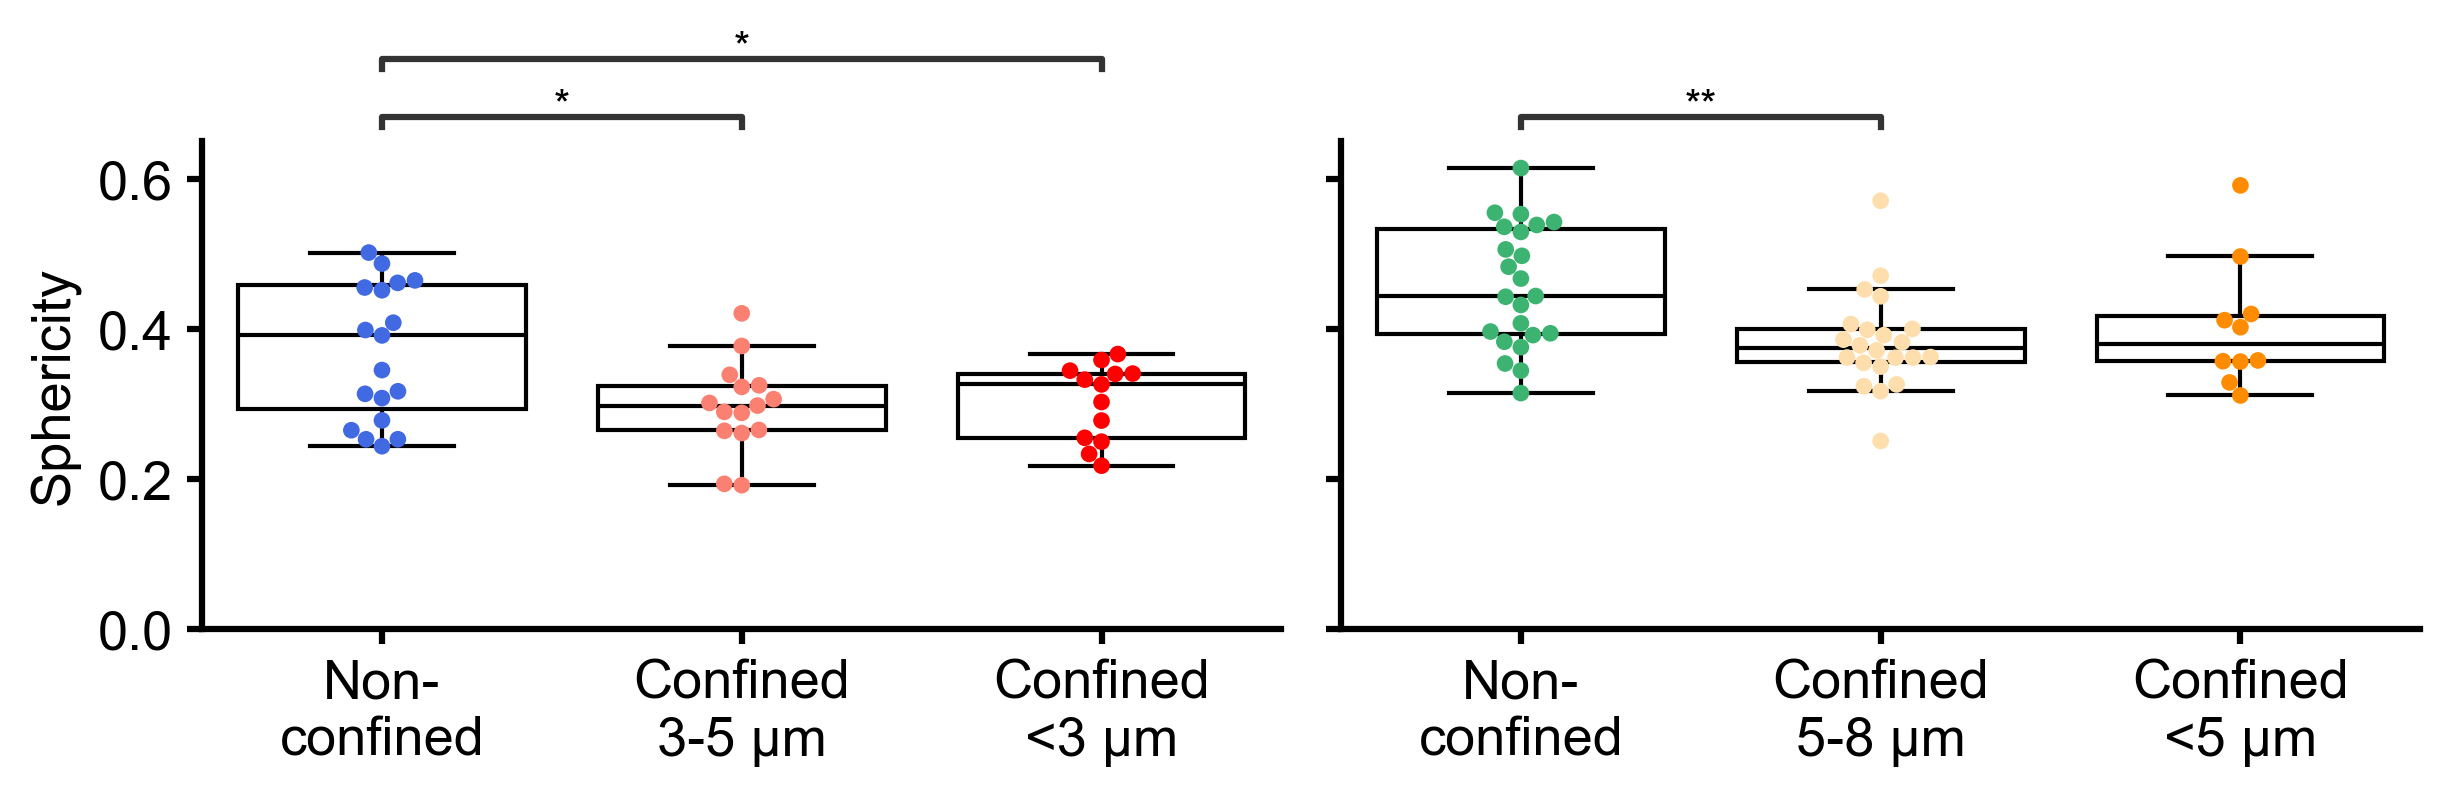

In [51]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "$<5.0$ -- $3.0$", "$<3.0$"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "$<8.0$ -- $5.0$", "$<5.0$"]
my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}


# Sphericity IMR90
feature = "Sphericity_nucleus"
sns.boxplot(
    data=df_IMR90_sphericity,
    x="Confiner height ($\mu$m)",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(
    data=df_IMR90_sphericity,
    x="Confiner height ($\mu$m)",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)


axes[0].set(ylabel=r"Sphericity")
axes[0].set_ylim(0, 0.65)
axes[0].set(xlabel=None)

# IMR90 statistics
pairs = [
    (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    # (confiner_labels_IMR90[1], confiner_labels_IMR90[2])
]

annotator = Annotator(
    ax=axes[0],
    pairs=pairs,
    data=df_IMR90_sphericity,
    x="Confiner height ($\mu$m)",
    y=feature,
    order=confiner_labels_IMR90,
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

# Sphericity HeLa
feature = "Sphericity_nucleus"
sns.boxplot(
    data=df_HeLa_sphericity,
    x="Confiner height ($\mu$m)",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)

sns.swarmplot(
    data=df_HeLa_sphericity,
    x="Confiner height ($\mu$m)",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)

# HeLa statistics
pairs = [
    (confiner_labels_HeLa[0], confiner_labels_HeLa[1]),
    # (confiner_labels_HeLa[0], confiner_labels_HeLa[2]),
    # (confiner_labels_HeLa[1], confiner_labels_HeLa[2])
]

annotator = Annotator(
    ax=axes[1],
    pairs=pairs,
    data=df_HeLa_sphericity,
    x="Confiner height ($\mu$m)",
    y=feature,
    order=confiner_labels_HeLa,
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set_ylim(0, 0.65)

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]
new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_HeLa)

plt.savefig("../../Figures/Supplementary/Suppl_Figure1A_C.pdf", bbox_inches="tight", dpi=300)

plt.show()

In [ ]:
df_IMR90_elongation = pd.read_csv("../../data/imr90_results/df_IMR90_elongation.csv")
df_IMR90_elongation = df_IMR90_elongation.drop("Unnamed: 0", axis=1)

df_HeLa_elongation = pd.read_csv("../../data/hela_results/df_HeLa_elongation.csv")
df_HeLa_elongation = df_HeLa_elongation.drop("Unnamed: 0", axis=1)

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/4183047859.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/4183047859.py:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$<5.0$ -- $3.0$ vs. $<3.0$: Mann-Whitney-Wilcoxon test two-sided, P_val:2.641e-02 U_stat=1.360e+02
Non-confined vs. $<3.0$: Mann-Whitney-Wilcoxon test two-sided, P_val:3.003e-02 U_stat=1.680e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/4183047859.py:128: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/4183047859.py:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_HeLa)


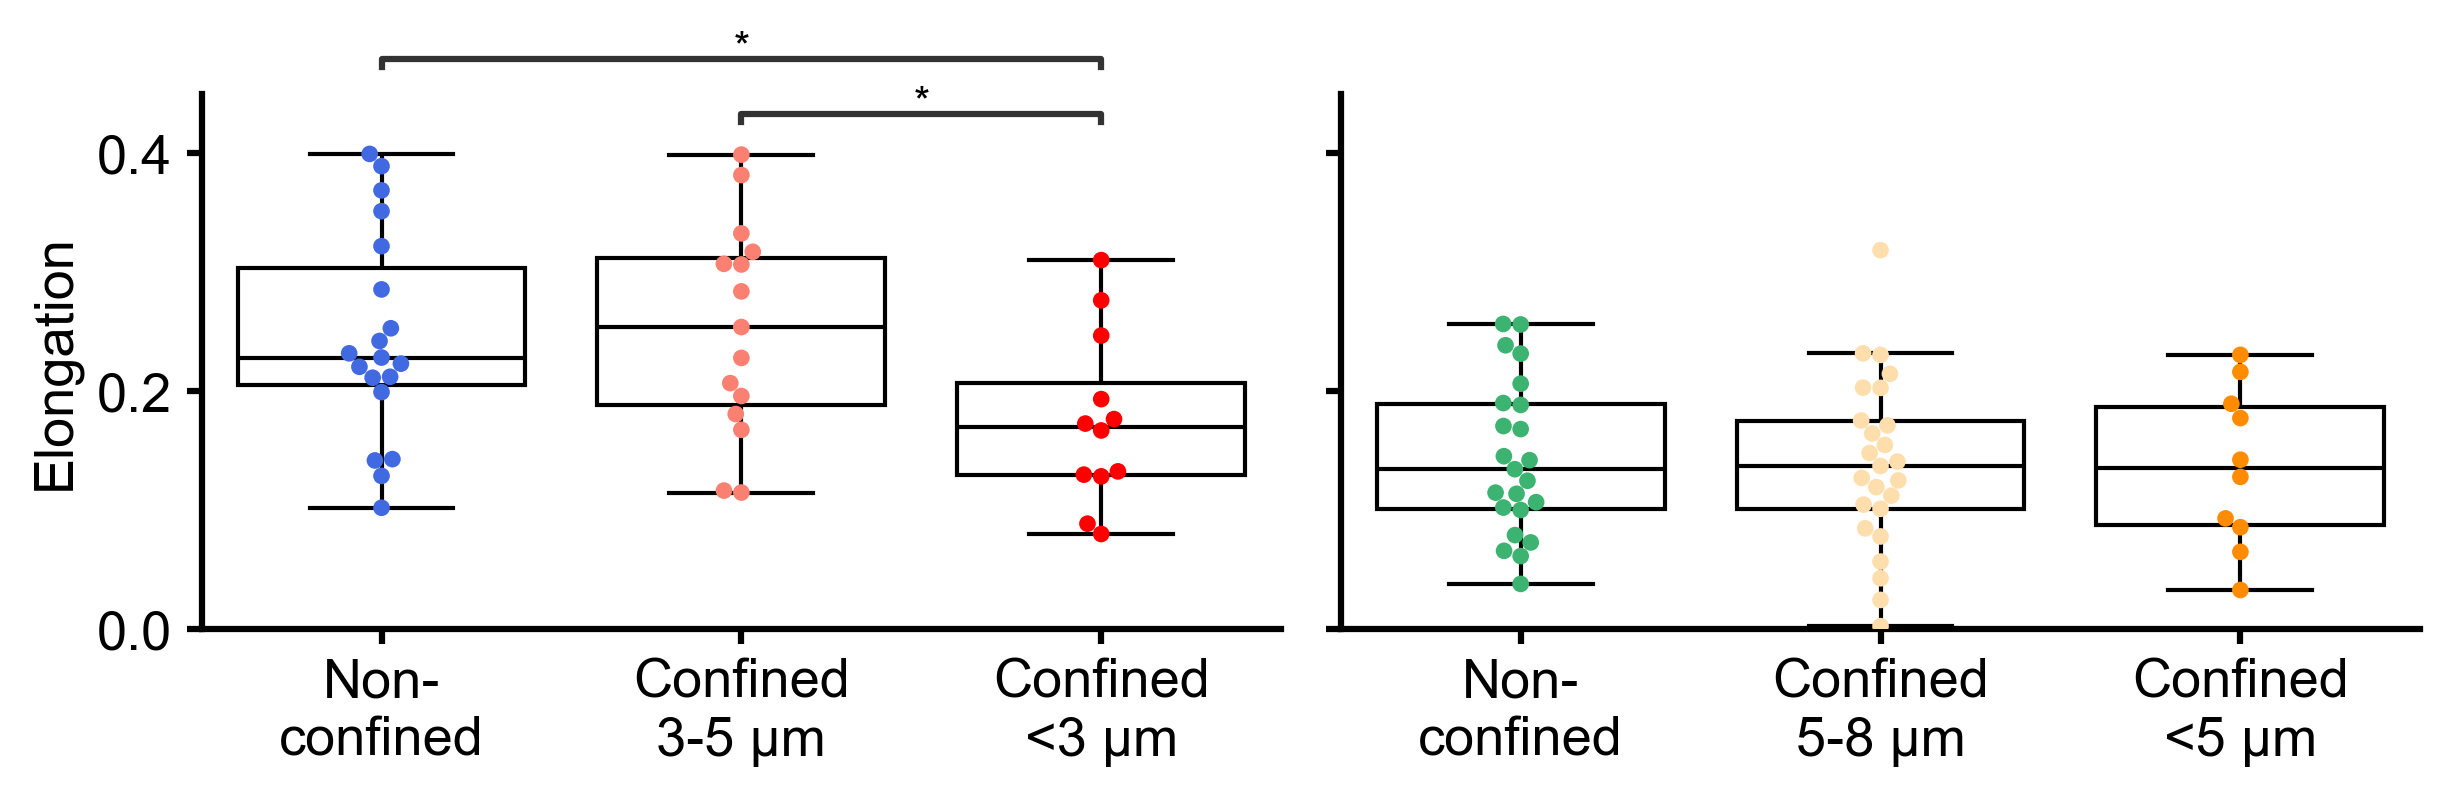

In [65]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "$<5.0$ -- $3.0$", "$<3.0$"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "$<8.0$ -- $5.0$", "$<5.0$"]
my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}


# E) Elongation IMR90
feature = "Elongation nucleus"
sns.boxplot(
    data=df_IMR90_elongation,
    x="Confiner height",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

axes[0].set(ylabel=r"Elongation")

sns.swarmplot(
    data=df_IMR90_elongation,
    x="Confiner height",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)

pairs = [
    # (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    (confiner_labels_IMR90[1], confiner_labels_IMR90[2]),
]

annotator = Annotator(
    ax=axes[0], pairs=pairs, data=df_IMR90_elongation, x="Confiner height", y=feature, order=confiner_labels_IMR90
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()


# F) Elongation HeLa
feature = "Elongation nucleus"
sns.boxplot(
    data=df_HeLa_elongation,
    x="Confiner height",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


axes[1].set(ylabel=None)
axes[1].set_ylim(0, 0.5)

sns.swarmplot(
    data=df_HeLa_elongation,
    x="Confiner height",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)
axes[0].set(xlabel=None)

axes[0].set(ylabel=r"Elongation")

axes[1].set_ylim(0, 0.45)

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]
new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_HeLa)

plt.savefig("../../Figures/Supplementary/Suppl_Figure1B_D.pdf", bbox_inches="tight", dpi=300)

plt.show()

#### Supplementary Figure 2

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/611753020.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/611753020.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 3-5: Mann-Whitney-Wilcoxon test two-sided, P_val:1.216e-04 U_stat=2.390e+02
Non-confined vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:4.034e-05 U_stat=2.310e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 5-8: Mann-Whitney-Wilcoxon test two-sided, P_val:1.288e-06 U_stat=5.040e+02
Non-confined vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:5.956e-06 U_stat=2.500e+02


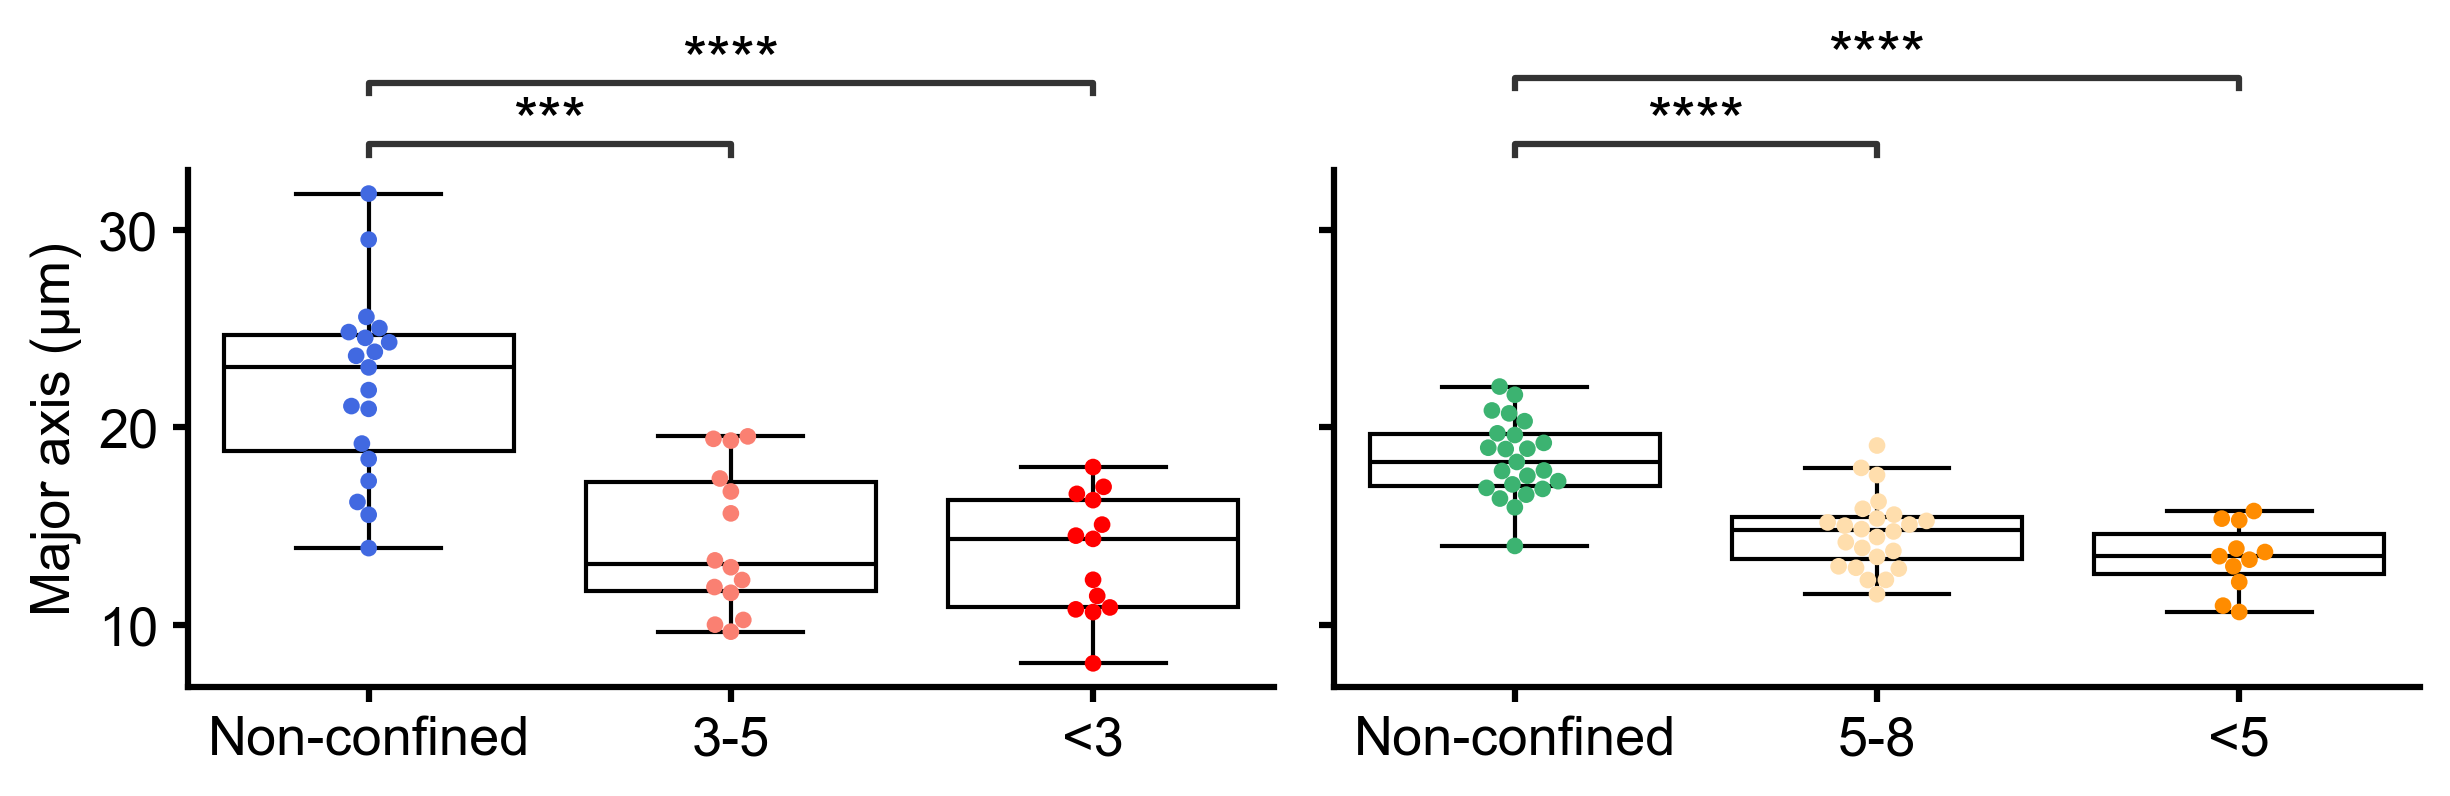

In [30]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "3-5", "<3"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "5-8", "<5"]

my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}

# IMR90
feature = "Major axis nucleus (um)"
sns.boxplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)

axes[0].set(ylabel=r"μm")
axes[0].set(xlabel=None)


# IMR90 statistics
pairs = [
    (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    # (confiner_labels_IMR90[1], confiner_labels_IMR90[2])
]

annotator = Annotator(
    ax=axes[0], pairs=pairs, data=df_sum_IMR90, x="Confiner_height", y=feature, order=confiner_labels_IMR90
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

# HeLa
feature = "Major axis nucleus (um)"
sns.boxplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


sns.swarmplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)

# HeLa statistics
pairs = [
    (confiner_labels_HeLa[0], confiner_labels_HeLa[1]),
    (confiner_labels_HeLa[0], confiner_labels_HeLa[2]),
    # (confiner_labels_HeLa[1], confiner_labels_HeLa[2])
]

annotator = Annotator(
    ax=axes[1], pairs=pairs, data=df_sum_HeLa, x="Confiner_height", y=feature, order=confiner_labels_HeLa
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

for p in axes[0].texts:
    p.set_fontsize(fontsize)

for p in axes[1].texts:
    p.set_fontsize(fontsize)

axes[0].set_ylabel("Major axis (µm)")


plt.savefig("../../Figures/Supplementary/Suppl_Figure2A_D.pdf", bbox_inches="tight", dpi=300)

plt.show()

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2644268242.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2644268242.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 3-5: Mann-Whitney-Wilcoxon test two-sided, P_val:9.611e-06 U_stat=2.550e+02
Non-confined vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.065e-04 U_stat=2.250e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-confined vs. 5-8: Mann-Whitney-Wilcoxon test two-sided, P_val:3.085e-07 U_stat=5.170e+02
Non-confined vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:9.984e-06 U_stat=2.470e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2644268242.py:142: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2644268242.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_HeLa)


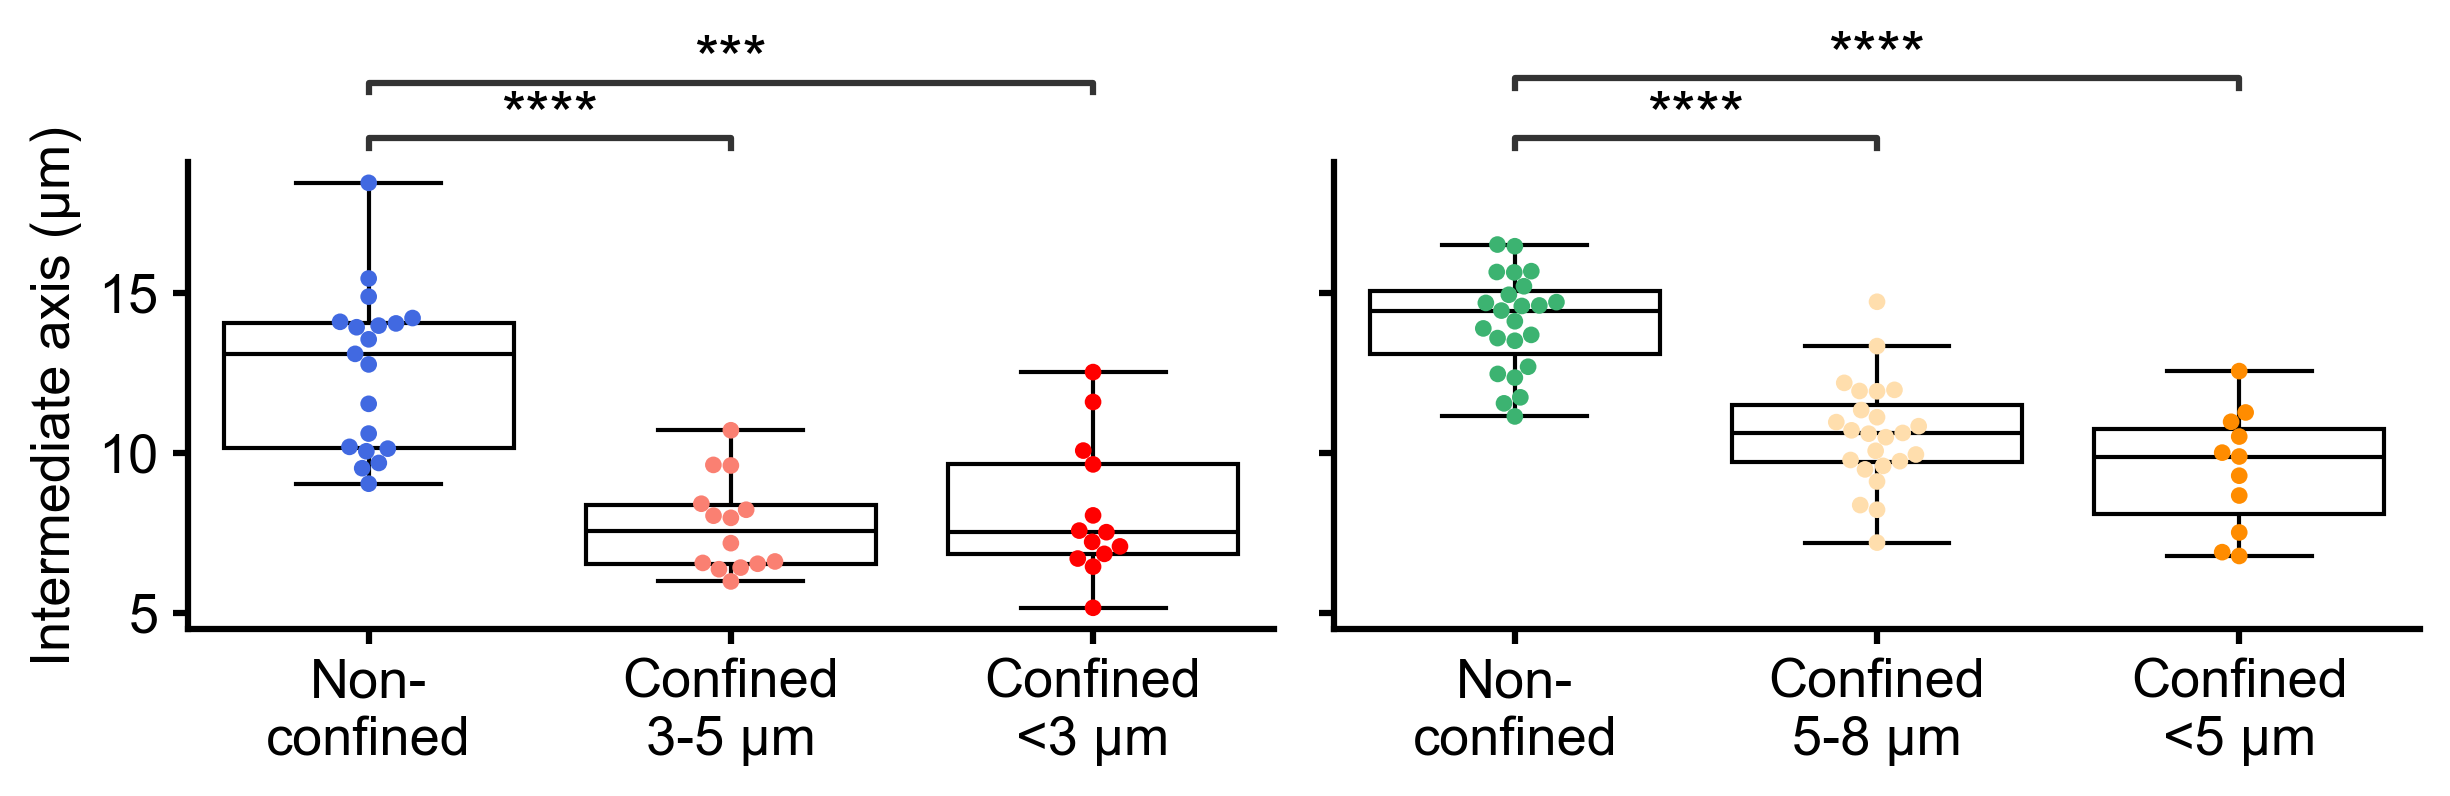

In [33]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "3-5", "<3"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "5-8", "<5"]

my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}

# IMR90
feature = "Intermediate axis nucleus (um)"
sns.boxplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)

axes[0].set(ylabel=r"μm")
axes[0].set(xlabel=None)


# IMR90 statistics
pairs = [
    (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    # (confiner_labels_IMR90[1], confiner_labels_IMR90[2])
]

annotator = Annotator(
    ax=axes[0], pairs=pairs, data=df_sum_IMR90, x="Confiner_height", y=feature, order=confiner_labels_IMR90
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

# HeLa
feature = "Intermediate axis nucleus (um)"
sns.boxplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


sns.swarmplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)

# HeLa statistics
pairs = [
    (confiner_labels_HeLa[0], confiner_labels_HeLa[1]),
    (confiner_labels_HeLa[0], confiner_labels_HeLa[2]),
    # (confiner_labels_HeLa[1], confiner_labels_HeLa[2])
]

annotator = Annotator(
    ax=axes[1], pairs=pairs, data=df_sum_HeLa, x="Confiner_height", y=feature, order=confiner_labels_HeLa
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)


new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]
new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_HeLa)
axes[0].set_ylabel("Intermediate axis (µm)")

plt.savefig("../../Figures/Supplementary/Suppl_Figure2B_E.pdf", bbox_inches="tight", dpi=300)

plt.show()

/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2543639980.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2543639980.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

3-5 vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:3.917e-02 U_stat=1.340e+02
Non-confined vs. <3: Mann-Whitney-Wilcoxon test two-sided, P_val:1.449e-03 U_stat=2.070e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-8 vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:8.621e-05 U_stat=2.430e+02
Non-confined vs. <5: Mann-Whitney-Wilcoxon test two-sided, P_val:4.702e-04 U_stat=2.220e+02


/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2543639980.py:143: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(new_confiner_labels_IMR90)
/var/folders/lf/ptmz_tjd7ql4qmczj2688yg40000gp/T/ipykernel_90061/2543639980.py:144: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(new_confiner_labels_HeLa)


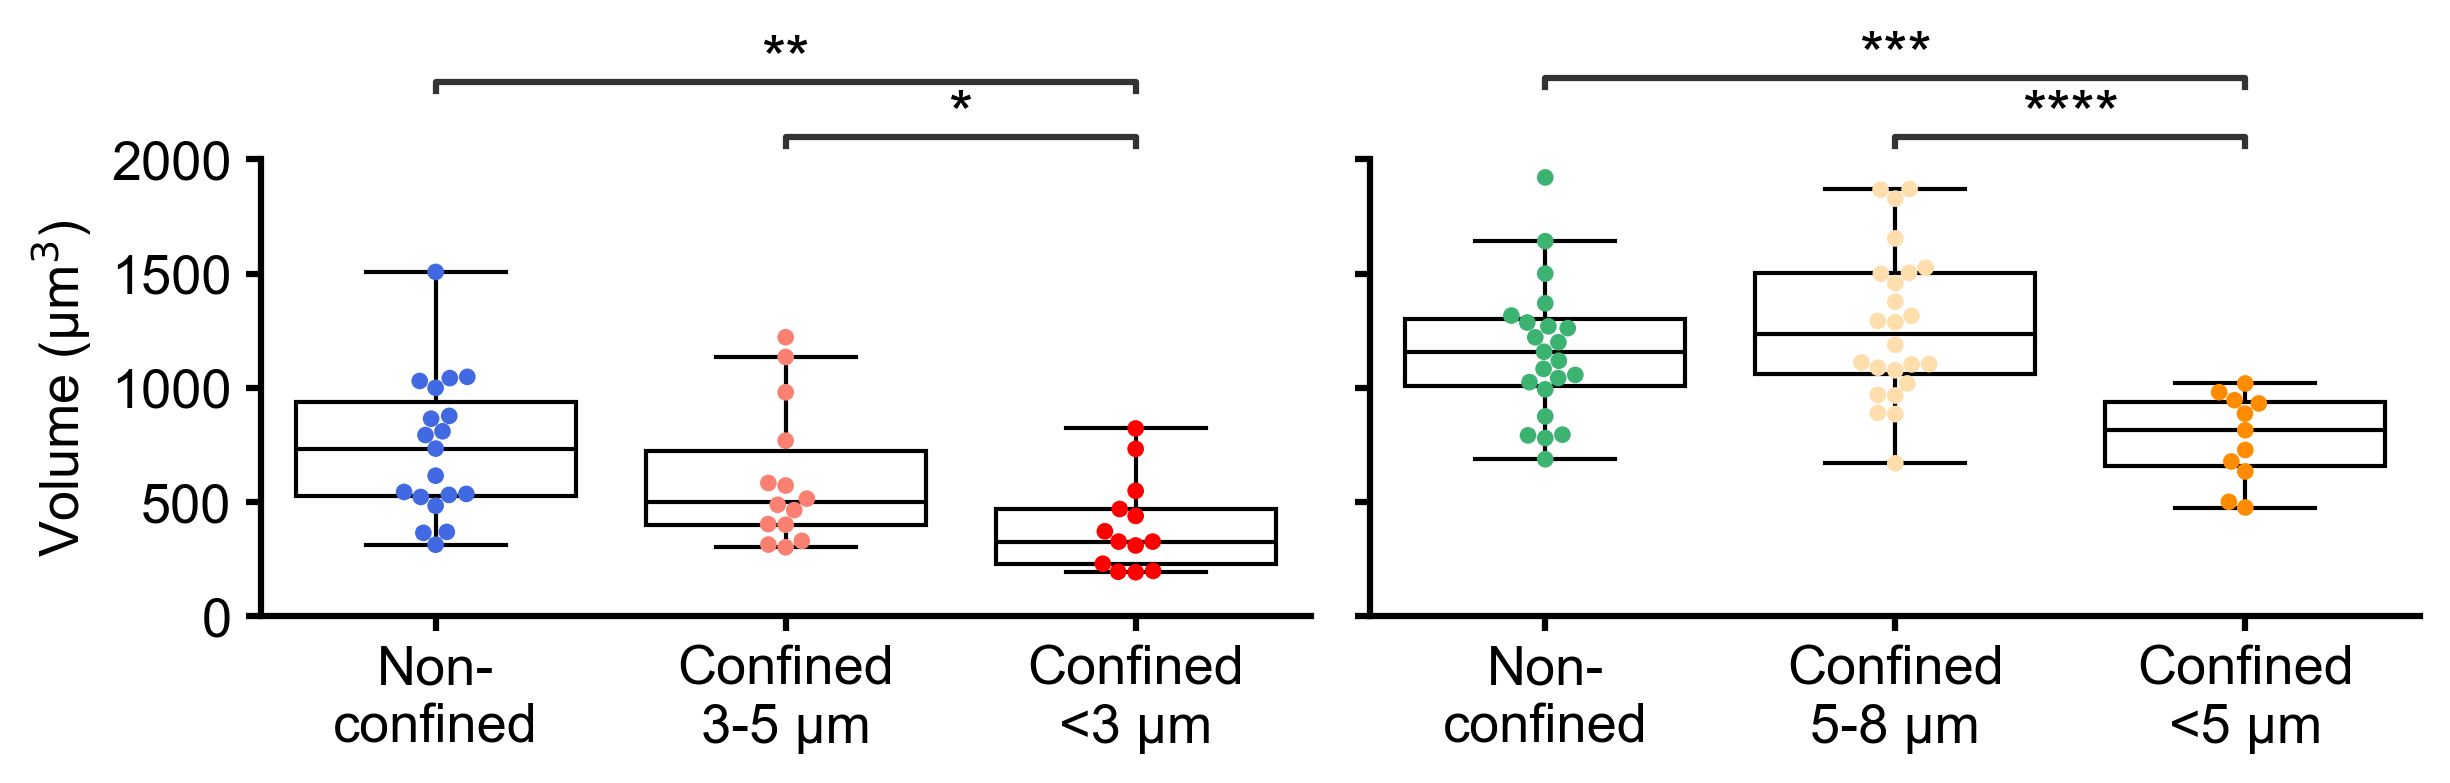

In [36]:
# Specify width and height in millimeters
fig_width_mm = 210
fig_height_mm = 70

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_IMR90 = ["Non-confined", "3-5", "<3"]
my_pal_IMR90 = {
    confiner_labels_IMR90[0]: "royalblue",
    confiner_labels_IMR90[1]: "salmon",
    confiner_labels_IMR90[2]: "r",
}

confiner_labels_HeLa = ["Non-confined", "5-8", "<5"]

my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}

# IMR90
feature = "Volume nucleus (um3)"
sns.boxplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    order=confiner_labels_IMR90,
    y=feature,
    # palette=my_pal_IMR90,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[0],
)

sns.swarmplot(
    data=df_sum_IMR90,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_IMR90,
    palette=my_pal_IMR90,
    ax=axes[0],
    size=4,
)

axes[0].set(ylabel=r"μm")
axes[0].set(xlabel=None)
axes[0].set_ylim(0, 2000)


# IMR90 statistics
pairs = [  # (confiner_labels_IMR90[0], confiner_labels_IMR90[1]),
    (confiner_labels_IMR90[0], confiner_labels_IMR90[2]),
    (confiner_labels_IMR90[1], confiner_labels_IMR90[2]),
]

annotator = Annotator(
    ax=axes[0], pairs=pairs, data=df_sum_IMR90, x="Confiner_height", y=feature, order=confiner_labels_IMR90
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

# HeLa
feature = "Volume nucleus (um3)"
sns.boxplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    order=confiner_labels_HeLa,
    y=feature,
    # palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


sns.swarmplot(
    data=df_sum_HeLa,
    x="Confiner_height",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=4,
)

axes[1].set(ylabel=None)
axes[1].set(xlabel=None)
axes[1].set_ylim(0, 2000)

# HeLa statistics
pairs = [
    # (confiner_labels_HeLa[0], confiner_labels_HeLa[1]),
    (confiner_labels_HeLa[0], confiner_labels_HeLa[2]),
    (confiner_labels_HeLa[1], confiner_labels_HeLa[2]),
]

annotator = Annotator(
    ax=axes[1], pairs=pairs, data=df_sum_HeLa, x="Confiner_height", y=feature, order=confiner_labels_HeLa
)
annotator.configure(test="Mann-Whitney", text_format="star", loc="outside", text_offset=-2)
annotator.apply_and_annotate()

lw = 1.5

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

for p in axes[0].texts:
    p.set_fontsize(fontsize)  # Adjust the fontsize as needed

for p in axes[1].texts:
    p.set_fontsize(fontsize)


new_confiner_labels_IMR90 = ["Non-\nconfined", "Confined\n3-5 μm", "Confined\n<3 μm"]
new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_IMR90)
axes[1].set_xticklabels(new_confiner_labels_HeLa)
axes[0].set_ylabel("Volume (µm$^3$)")


plt.show()

#### Supplementary Figure 7

In [ ]:
df_nc_HeLa = df_HeLa[df_HeLa["Condition"] == "Non-Confined"]
df_conf_HeLa = df_HeLa[df_HeLa["Condition"] == "Confined"]

In [ ]:
##### Specify width and height in millimeters
fig_width_mm = 210  # width of figure - same as A4 page
fig_height_mm = 75  # height of figure

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

# Set up figure axes, replace ncols with number of columns for figures, dpi=300
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

# KDE-plots of radial distance scaled HeLa
sns.kdeplot(
    data=df_nc_HeLa,
    ax=axes[0],
    x="Radial distance random point scaled",
    color="mediumseagreen",
    linestyle="--",
    label="NC_ctrl",
)
sns.kdeplot(
    data=df_conf_HeLa,
    ax=axes[0],
    x="Radial distance random point scaled",
    color="darkorange",
    linestyle="--",
    label="Conf_ctrl",
)
sns.kdeplot(
    data=df_nc_HeLa, ax=axes[0], x="Radial distance HP1a condensate scaled", color="mediumseagreen", label="NC_cond"
)
sns.kdeplot(
    data=df_conf_HeLa, ax=axes[0], x="Radial distance HP1a condensate scaled", color="darkorange", label="Conf_cond"
)

axes[0].set(xlabel=r"r scaled")
axes[0].set_ylim(0, 5.5)
axes[0].set_xlim(-0.1, 0.7)
axes[0].set_yticks([0, 1, 2, 3, 4, 5])
axes[0].set_xticks([0, 0.2, 0.4, 0.6])

# KDE-plots of peripheral distance scaled HeLa
sns.kdeplot(
    data=df_nc_HeLa,
    ax=axes[1],
    x="Minimum peripheral distance random point scaled",
    color="mediumseagreen",
    linestyle="--",
    label="NC_ctrl",
)
sns.kdeplot(
    data=df_conf_HeLa,
    ax=axes[1],
    x="Minimum peripheral distance random point scaled",
    color="darkorange",
    linestyle="--",
    label="Conf_ctrl",
)
sns.kdeplot(
    data=df_nc_HeLa,
    ax=axes[1],
    x="Minimum peripheral distance HP1a condensate scaled",
    color="mediumseagreen",
    label="NC_cond",
)
sns.kdeplot(
    data=df_conf_HeLa,
    ax=axes[1],
    x="Minimum peripheral distance HP1a condensate scaled",
    color="darkorange",
    label="Conf_cond",
)

axes[1].set(xlabel=r"p scaled")
axes[1].set_ylim(0, 5.5)
axes[1].set_xlim(-0.2, 0.7)
axes[1].set_yticks([0, 1, 2, 3, 4, 5])
axes[1].set_xticks([0, 0.2, 0.4, 0.6])
axes[1].legend(frameon=False, loc="upper right", bbox_to_anchor=(1.1, 1.1))

# x and y axes spines
lw = 1.5  # thickness

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

plt.savefig("../../Figures/Supplementary/Suppl_Figure7A_B.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
##### Specify width and height in millimeters
fig_width_mm = 210  # width of figure - same as A4 page
fig_height_mm = 75  # height of figure

# Convert millimeters to inches (1 inch = 25.4 mm)
fig_width_inches = fig_width_mm / 25.4
fig_height_inches = fig_height_mm / 25.4

# Set up figure axes, replace ncols with number of columns for figures, dpi=300
fig, axes = plt.subplots(
    nrows=1, ncols=2, figsize=(fig_width_inches, fig_height_inches), tight_layout=True, dpi=300, sharey=True
)

confiner_labels_HeLa = ["Non-confined", "$<8.0$ -- $5.0$", "$<5.0$"]
my_pal_HeLa = {
    confiner_labels_HeLa[0]: "mediumseagreen",
    confiner_labels_HeLa[1]: "navajowhite",
    confiner_labels_HeLa[2]: "darkorange",
}


# Radial distance scaled HeLa
feature = "Radial distance HP1a condensate scaled"
sns.boxplot(
    data=df_HeLa, x="Confiner height (um)", order=confiner_labels_HeLa, y=feature, palette=my_pal_HeLa, ax=axes[0]
)

axes[0].set(ylabel="HP1α condensate \n radial distance scaled")
axes[0].set(xlabel=None)
axes[0].set_ylim(-0.02, 0.55)


# Peripheral distance scaled HeLa
feature = "Minimum peripheral distance HP1a condensate scaled"
sns.boxplot(
    data=df_HeLa,
    x="Confiner height (um)",
    order=confiner_labels_HeLa,
    y=feature,
    palette=my_pal_HeLa,
    color="white",
    # width=0.5,
    boxprops=dict(edgecolor="black"),
    capprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker="o", markersize=4, markerfacecolor="white", markeredgecolor="white"),
    ax=axes[1],
)


outliers_df_HeLa_nc = df_HeLa[(df_HeLa["Confiner height (um)"] == confiner_labels_HeLa[0]) & (df_HeLa[feature] > 0.35)]

sns.swarmplot(
    data=outliers_df_HeLa_nc,
    x="Confiner height (um)",
    y=feature,
    order=confiner_labels_HeLa,
    palette=my_pal_HeLa,
    ax=axes[1],
    size=5,
)

axes[1].set(ylabel="HP1α condensate \n peripheral distance scaled")
axes[1].set(xlabel=None)

# x and y axes spines
lw = 1.5  # thickness

axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[0].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[0].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)
axes[1].spines["left"].set_linewidth(lw)  # Increase linewidth for the left spine if desired
axes[1].spines["bottom"].set_linewidth(lw)  # Increase linewidth for the bottom spine if desired
axes[1].tick_params(axis="both", which="major", width=lw)  # Increase tick width if desired

fontsize = 15

for p in axes[0].texts:
    p.set_fontsize(fontsize)

for p in axes[1].texts:
    p.set_fontsize(fontsize)

new_confiner_labels_HeLa = ["Non-\nconfined", "Confined\n5-8 μm", "Confined\n<5 μm"]

axes[0].set_xticklabels(new_confiner_labels_HeLa)
axes[1].set_xticklabels(new_confiner_labels_HeLa)


plt.savefig("../../Figures/Supplementary/Suppl_Figure7C_D.pdf", bbox_inches="tight", dpi=300)
plt.show()